<a href="https://colab.research.google.com/github/santosrc/Holacracy-Constitution-4.1-PORTUGUESE/blob/master/pricing_validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Carregando os datasets

In [ ]:
p = pd.read_csv('/content/drive/My Drive/Cópia de Vendas_diario_2020_05.csv')
q = pd.read_csv('/content/drive/My Drive/Cópia de Vendas_diario_2020_06.csv')
r = pd.read_csv('/content/drive/My Drive/Cópia de Vendas_diario_2020_07.csv')
s = pd.read_csv('/content/drive/My Drive/Vendas_diario_2020_08.csv')
t = pd.read_csv('/content/drive/My Drive/Cópia de Vendas_diario_2020_09.csv')

### Volume e vendas mês a mês

In [ ]:
print('volume maio',p.VOLUME.sum())
print('volume junho',q.VOLUME.sum())
print('volume julho',r.VOLUME.sum())
print('volume agosto',s.VOLUME.sum())
print('volume setembro',t.VOLUME.sum())
print('vendas maio',p.VENDAS.sum())
print('vendas junho',q.VENDAS.sum())
print('vendas julho',r.VENDAS.sum())
print('vendas agosto',s.VENDAS.sum())
print('vendas setembro',t.VENDAS.sum())

volume maio 16194587.645000003
volume junho 14868429.327000005
volume julho 15288998.332999997
volume agosto 15278207.61700001
volume setembro 6366336.591
vendas maio 161290665.49999985
vendas junho 150021561.55999994
vendas julho 157480080.57999998
vendas agosto 158500219.92999998
vendas setembro 65364140.209999986


In [ ]:
s.Data = pd.to_datetime(s.Data)
s.sort_values(by=['Data'])

,Data,SK_LOJA,SK_PRODUTO,VOLUME,VENDAS,DESCONTOS,IMPOSTOS,CUSTOS,MARGEM,CUPONS
0,2020-08-01,3,35,19.000,56.81,0.0,0.00,21.89,34.92,19
74081,2020-08-01,59,30696,2.542,38.12,0.0,3.54,12.05,22.53,9
74080,2020-08-01,59,30693,0.150,8.68,0.0,2.36,2.10,4.22,1
74079,2020-08-01,59,30641,2.000,13.98,0.0,0.00,8.50,5.48,2
74078,2020-08-01,59,30635,4.000,19.96,0.0,3.24,8.98,7.74,2
...,...,...,...,...,...,...,...,...,...,...
3086591,2020-08-31,25,19141,1.000,19.99,0.0,0.00,13.08,6.91,1
3086590,2020-08-31,23,25800,0.000,0.00,0.0,0.00,0.23,-0.23,0
3086589,2020-08-31,23,25797,0.000,0.00,0.0,0.00,-0.68,0.68,0
3086600,2020-08-31,25,32036,5.000,53.95,0.0,8.80,21.83,23.32,5


In [ ]:
lista = [q,r,s,t]
df = p
for z in lista:
    df = pd.concat([df,z], ignore_index=True)

In [ ]:
df

,Data,SK_LOJA,SK_PRODUTO,VOLUME,VENDAS,DESCONTOS,IMPOSTOS,CUSTOS,MARGEM,CUPONS
0,2020-06-01,3,99,68.455,273.64,0.0,0.00,135.87,137.77,80
1,2020-06-01,3,108,224.085,1663.35,0.1,0.00,942.73,720.62,206
2,2020-06-01,3,163,261.910,950.30,0.0,0.00,416.85,533.45,111
3,2020-06-01,3,169,130.790,524.81,0.0,0.00,292.21,232.60,181
4,2020-06-01,3,227,3.000,17.97,0.0,0.00,5.99,11.98,3
...,...,...,...,...,...,...,...,...,...,...
10484796,2020-09-13,93,6643,0.000,0.00,0.0,0.00,48.15,-48.15,0
10484797,2020-09-13,93,9953,1.000,5.89,0.0,1.73,2.21,1.95,1
10484798,2020-09-13,93,16707,1.000,4.99,0.0,0.00,3.10,1.89,1
10484799,2020-09-13,93,34065,2.000,19.98,0.0,0.00,9.60,10.38,1


In [ ]:
df.Data = pd.to_datetime(df.Data)

In [ ]:
df.sort_values(by=['Data'])

,Data,SK_LOJA,SK_PRODUTO,VOLUME,VENDAS,DESCONTOS,IMPOSTOS,CUSTOS,MARGEM,CUPONS
0,2020-06-01,3,99,68.455,273.64,0.0,0.00,135.87,137.77,80
61039,2020-06-01,60,1905,3.000,64.77,0.0,6.00,40.99,17.78,3
61038,2020-06-01,60,1725,2.000,15.98,0.0,4.36,5.59,6.03,2
61037,2020-06-01,60,1722,1.000,7.99,0.0,0.74,3.54,3.71,1
61036,2020-06-01,60,1716,0.470,28.15,0.0,5.07,11.76,11.32,2
...,...,...,...,...,...,...,...,...,...,...
10424150,2020-09-13,17,17763,23.000,125.07,35.7,36.61,61.58,26.88,17
10424149,2020-09-13,17,17519,1.000,6.99,0.0,0.65,3.88,2.46,1
10424148,2020-09-13,17,17284,1.000,9.99,0.0,0.92,4.67,4.40,1
10424124,2020-09-13,17,4383,1.000,4.99,0.0,0.46,2.57,1.96,1


In [ ]:
xls = pd.ExcelFile('/content/drive/My Drive/produto.xlsx')
prod = pd.read_excel(xls, 'produtos')
lj = pd.read_excel(xls, 'lojas')
lj

,SK_LOJA,COD_LOJA_NOME
0,30,H068 BROOKLIN OLD
1,31,H071 PARAÍSO
2,32,H072 MOEMA
3,33,H074 ITAIM
4,35,H077 HIGIENÓPOLIS
5,37,H079 SANTOS
6,43,H088 CD SP FLV
7,55,T100 VILA MADALENA
8,56,T110 CD SP MULTICAT
9,57,T148 INTERLAGOS


In [ ]:
df_filtered = df[df['SK_LOJA'].isin(lj.SK_LOJA.tolist())]

In [ ]:
df_filtered.shape

(3236864, 10)

In [ ]:
prod.head()

,SK_PRODUTO,COD_INTERNO,DATA_VIRADA
0,1677,101680,2020-08-13
1,1912,101920,2020-07-29
2,5356,105491,2020-08-13
3,7284,107458,2020-08-13
4,11616,111884,2020-08-13


In [ ]:
prod.DATA_VIRADA = pd.to_datetime(prod.DATA_VIRADA)

In [ ]:
prod.sort_values(by=['DATA_VIRADA'])

,SK_PRODUTO,COD_INTERNO,DATA_VIRADA
243,36050,141897,2020-07-23
1790,38302,145092,2020-07-23
519,6733,106903,2020-07-23
1141,16869,117841,2020-07-23
1379,26312,129875,2020-07-23
...,...,...,...
948,22413,124942,2020-08-13
949,31931,136678,2020-08-13
950,33740,138882,2020-08-13
958,28467,132291,2020-08-13


In [ ]:
df_normal = df_filtered[~ df_filtered['SK_PRODUTO'].isin(prod.SK_PRODUTO.tolist())]
df_virada = df_filtered[df_filtered['SK_PRODUTO'].isin(prod.SK_PRODUTO.tolist())]
df_normal.head()

,Data,SK_LOJA,SK_PRODUTO,VOLUME,VENDAS,DESCONTOS,IMPOSTOS,CUSTOS,MARGEM,CUPONS
28872,2020-05-01,31,74,23.155,103.93,0.18,0.0,39.39,64.54,25
28873,2020-05-01,31,193,7.125,64.31,0.00,0.0,22.94,41.37,11
28874,2020-05-01,31,202,2.179,13.05,0.00,0.0,5.69,7.36,1
28875,2020-05-01,31,257,1.655,19.85,0.00,0.0,7.08,12.77,2
28876,2020-05-01,31,315,30.662,245.06,0.00,0.0,110.24,134.82,41


In [ ]:
df_virada.SK_PRODUTO.nunique()

1881

In [ ]:
dic = dict(zip(prod.SK_PRODUTO, prod.DATA_VIRADA))
df_virada['VIRADA'] = df_virada.SK_PRODUTO.map(dic)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df_virada.head()

,Data,SK_LOJA,SK_PRODUTO,VOLUME,VENDAS,DESCONTOS,IMPOSTOS,CUSTOS,MARGEM,CUPONS,VIRADA
28890,2020-05-01,31,4781,6.0,17.94,0.00,0.00,10.98,6.96,1,2020-07-29
28891,2020-05-01,31,6773,0.0,0.00,0.00,0.00,3.33,-3.33,0,2020-07-28
28895,2020-05-01,31,10934,4.0,27.96,0.00,5.04,14.08,8.84,4,2020-07-28
29424,2020-05-01,31,11169,5.0,54.76,0.19,0.00,40.50,14.26,5,2020-07-28
29425,2020-05-01,31,12130,1.0,13.99,0.00,1.29,7.08,5.62,1,2020-07-28


In [ ]:
df_virada['delta'] = df_virada['Data'] - df_virada['VIRADA']
df_virada['delta'] = df_virada['delta'].dt.days
df_virada.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Data,SK_LOJA,SK_PRODUTO,VOLUME,VENDAS,DESCONTOS,IMPOSTOS,CUSTOS,MARGEM,CUPONS,VIRADA,delta
28890,2020-05-01,31,4781,6.0,17.94,0.00,0.00,10.98,6.96,1,2020-07-29,-89
28891,2020-05-01,31,6773,0.0,0.00,0.00,0.00,3.33,-3.33,0,2020-07-28,-88
28895,2020-05-01,31,10934,4.0,27.96,0.00,5.04,14.08,8.84,4,2020-07-28,-88
29424,2020-05-01,31,11169,5.0,54.76,0.19,0.00,40.50,14.26,5,2020-07-28,-88
29425,2020-05-01,31,12130,1.0,13.99,0.00,1.29,7.08,5.62,1,2020-07-28,-88


In [ ]:
df_before = df_virada[(df_virada.delta > -29) & (df_virada.delta < 0)]
df_after = df_virada[(df_virada.delta < 29) & (df_virada.delta > 0)]
df_control = df_virada[(df_virada.delta < -29) & (df_virada.delta > -58)]
df_control2 = df_virada[(df_virada.delta < -58) & (df_virada.delta > -87)]

In [ ]:
df_virada.VIRADA.value_counts()

2020-07-28    399224
2020-08-13    379441
2020-07-29    165502
2020-07-25     62736
2020-07-23     19489
Name: VIRADA, dtype: int64

In [ ]:
batch1 = df_virada['SK_PRODUTO'][df_virada.VIRADA==pd.to_datetime('2020-07-23')].unique().tolist()
batch2 = df_virada['SK_PRODUTO'][df_virada.VIRADA==pd.to_datetime('2020-07-25')].unique().tolist()
batch3 = df_virada['SK_PRODUTO'][df_virada.VIRADA==pd.to_datetime('2020-07-28')].unique().tolist()
batch4 = df_virada['SK_PRODUTO'][df_virada.VIRADA==pd.to_datetime('2020-07-29')].unique().tolist()
batch5 = df_virada['SK_PRODUTO'][df_virada.VIRADA==pd.to_datetime('2020-08-13')].unique().tolist()

In [ ]:
df_after.shape

(206801, 12)

In [ ]:
df_before.shape

(208880, 12)

In [ ]:
df_control.shape

(212230, 12)

In [ ]:
df_control2.shape

(213453, 12)

### Volume e Vendas antes, depois da virada e no período de controle

In [ ]:
print('volume virada',df_after.VOLUME.sum())
print('volume antes da virada',df_before.VOLUME.sum())
print('volume controle',df_control.VOLUME.sum())
print('vendas virada',df_after.VENDAS.sum())
print('vendas antes da virada',df_before.VENDAS.sum())
print('vendas controle',df_control.VENDAS.sum())
print('variação volume V+28',round(100*(((df_after.VOLUME.sum()-df_before.VOLUME.sum())/df_before.VOLUME.sum())),2),'%')
print('variação vendas V+28',round(100*((df_after.VENDAS.sum()-df_before.VENDAS.sum())/df_before.VENDAS.sum()),2),'%')
print('variação volume V-28',round(100*((df_before.VOLUME.sum()-df_control.VOLUME.sum())/df_control.VOLUME.sum()),2),'%')
print('variação vendas V-28',round(100*((df_before.VENDAS.sum()-df_control.VENDAS.sum())/df_control.VENDAS.sum()),2),'%')
print('variação volume V-56 até v-28',round(100*((df_control.VOLUME.sum()-df_control2.VOLUME.sum())/df_control2.VOLUME.sum()),2),'%')
print('variação vendas V-56 até V-28',round(100*((df_control.VENDAS.sum()-df_control2.VENDAS.sum())/df_control2.VENDAS.sum()),2),'%')

volume virada 585985.0
volume antes da virada 592380.01
volume controle 619938.0
vendas virada 5589677.410000001
vendas antes da virada 5655942.800000001
vendas controle 5860270.879999998
variação volume V+28 -1.08 %
variação vendas V+28 -1.17 %
variação volume V-28 -4.45 %
variação vendas V-28 -3.49 %
variação volume V-56 até v-28 -4.22 %
variação vendas V-56 até V-28 -3.28 %


### Volume e vendas antes, depois da virada e no período controle do restantes dos SKU´s

In [ ]:
controle = pd.read_excel('/content/drive/My Drive/Produtos_Controle_Analisados.xlsx')
produto = pd.read_csv('/content/drive/My Drive/Cópia de dim_produto.csv')
dic = dict(zip(produto.COD_INTERNO, produto.SK_PRODUTO))
controle['SK_PRODUTO'] = controle['COD_INTERNO'].map(dic)
df_controle = df_filtered[df_filtered.SK_PRODUTO.isin(controle.SK_PRODUTO.tolist())]
df_controle['VIRADA'] = pd.to_datetime('2020-07-31')
df_controle['delta'] = df_controle['Data'] - df_controle['VIRADA']
df_controle['delta'] = df_controle['delta'].dt.days
df_before_normal = df_controle[(df_controle.delta > -29) & (df_controle.delta < 0)]
df_after_normal = df_controle[(df_controle.delta < 29) & (df_controle.delta > 0)]
df_control_normal = df_controle[(df_controle.delta < -29) & (df_controle.delta > -58)]
df_control_normal2 = df_controle[(df_controle.delta < -58) & (df_controle.delta > -87)]
print('volume virada',df_after_normal.VOLUME.sum())
print('volume antes da virada',df_before_normal.VOLUME.sum())
print('volume controle',df_control_normal.VOLUME.sum())
print('vendas virada',df_after_normal.VENDAS.sum())
print('vendas antes da virada',df_before_normal.VENDAS.sum())
print('vendas controle',df_control_normal.VENDAS.sum())
print('variação volume virada',round(100*(((df_after_normal.VOLUME.sum()-df_before_normal.VOLUME.sum())/df_before_normal.VOLUME.sum())),2),'%')
print('variação vendas virada',round(100*((df_after_normal.VENDAS.sum()-df_before_normal.VENDAS.sum())/df_before_normal.VENDAS.sum()),2),'%')
print('variação volume controle',round(100*((df_before_normal.VOLUME.sum()-df_control_normal.VOLUME.sum())/df_control_normal.VOLUME.sum()),2),'%')
print('variação vendas controle',round(100*((df_before_normal.VENDAS.sum()-df_control_normal.VENDAS.sum())/df_control_normal.VENDAS.sum()),2),'%')
print('variação volume controle2',round(100*((df_control_normal.VOLUME.sum()-df_control_normal2.VOLUME.sum())/df_control_normal2.VOLUME.sum()),2),'%')
print('variação vendas controle2',round(100*((df_control_normal.VENDAS.sum()-df_control_normal2.VENDAS.sum())/df_control_normal2.VENDAS.sum()),2),'%')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

volume virada 685919.9409999999
volume antes da virada 679161.2289999998
volume controle 716899.7670000001
vendas virada 10636130.659999998
vendas antes da virada 10583144.75
vendas controle 10660364.219999999
variação volume virada 1.0 %
variação vendas virada 0.5 %
variação volume controle -5.26 %
variação vendas controle -0.72 %
variação volume controle2 0.83 %
variação vendas controle2 0.97 %


In [ ]:
df_delta = df_virada.groupby(['Data']).sum()
df_delta.head()

,SK_LOJA,SK_PRODUTO,VOLUME,VENDAS,DESCONTOS,IMPOSTOS,CUSTOS,MARGEM,CUPONS,delta
Data,,,,,,,,,,
2020-05-01,530368,213994267,31070.0,283007.89,1612.54,26380.85,153073.71,103553.33,19992,-831388
2020-05-02,546302,219307732,30805.0,288882.52,1072.48,26550.49,155665.46,106666.57,20387,-846108
2020-05-03,456027,185031771,23225.0,210393.12,894.50,18418.58,113736.20,78238.34,15490,-701455
2020-05-04,449805,182554144,22961.0,201121.04,987.49,17437.18,108343.42,75340.44,15161,-683903
2020-05-05,468217,188526703,23997.0,215842.37,1314.52,18955.07,117064.79,79822.51,16310,-709108


In [ ]:
df_delta['MA_volume'] = df_delta.VOLUME.rolling(window=7).mean()
df_delta['MA_vendas'] = df_delta.VENDAS.rolling(window=7).mean()

In [ ]:
df_delta.head()

,SK_LOJA,SK_PRODUTO,VOLUME,VENDAS,DESCONTOS,IMPOSTOS,CUSTOS,MARGEM,CUPONS,delta,MA_volume,MA_vendas
Data,,,,,,,,,,,,
2020-05-01,530368,213994267,31070.0,283007.89,1612.54,26380.85,153073.71,103553.33,19992,-831388,NaN,NaN
2020-05-02,546302,219307732,30805.0,288882.52,1072.48,26550.49,155665.46,106666.57,20387,-846108,NaN,NaN
2020-05-03,456027,185031771,23225.0,210393.12,894.50,18418.58,113736.20,78238.34,15490,-701455,NaN,NaN
2020-05-04,449805,182554144,22961.0,201121.04,987.49,17437.18,108343.42,75340.44,15161,-683903,NaN,NaN
2020-05-05,468217,188526703,23997.0,215842.37,1314.52,18955.07,117064.79,79822.51,16310,-709108,NaN,NaN


### Média móvel da soma do volume e vendas dos SKU´s target

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7faf48bb70f0>,
      dtype=object)

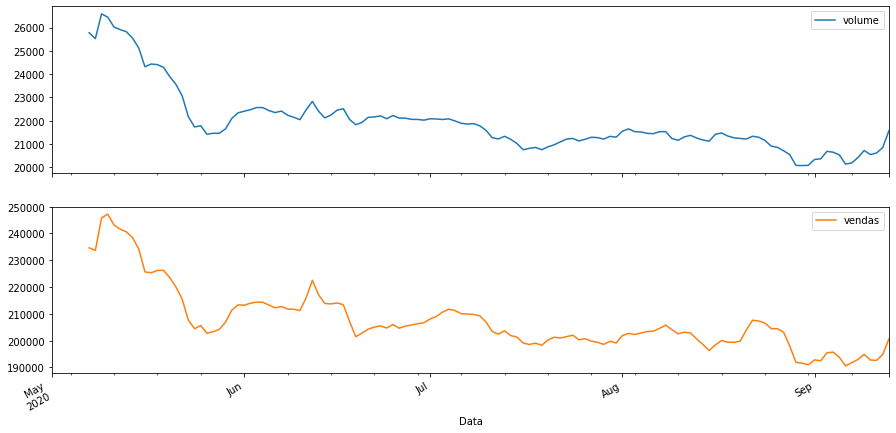

In [ ]:
df_plot = pd.DataFrame({
   'volume': df_delta.MA_volume.tolist(),
   'vendas': df_delta.MA_vendas.tolist()
   }, index=df_delta.index)

df_plot.plot(figsize=(15,7.5), subplots=True)

In [ ]:
df_preco_before = df_before.groupby(['SK_PRODUTO']).mean()
df_preco_before['preco'] = df_preco_before['VENDAS']/df_preco_before['VOLUME']
df_preco_after = df_after.groupby(['SK_PRODUTO']).mean()
df_preco_after['preco'] = df_preco_after['VENDAS']/df_preco_after['VOLUME']
dic = dict(zip(df_preco_after.index, df_preco_after.preco))
df_preco_before['preco_after'] = df_preco_before.index.map(dic)
df_preco_before['aumento'] = df_preco_before['preco_after'] > df_preco_before['preco']
df_preco_before.head()

,SK_LOJA,VOLUME,VENDAS,DESCONTOS,IMPOSTOS,CUSTOS,MARGEM,CUPONS,delta,preco,preco_after,aumento
SK_PRODUTO,,,,,,,,,,,,
40,60.114943,6.911877,19.878812,0.052452,0.0,5.972107,13.906705,5.877395,-14.149425,2.876037,2.942632,True
105,59.522124,2.247788,11.197168,0.019292,0.0,3.993009,7.204159,1.933628,-14.548673,4.981417,4.275848,False
115,60.555556,3.606061,35.220455,0.013687,0.0,14.961212,20.259242,2.818182,-14.676768,9.767017,8.232315,False
453,59.638211,5.166667,27.023780,0.028211,0.0,10.882317,16.141463,3.516260,-14.471545,5.230409,4.985563,False
564,58.509934,3.185430,17.896854,0.022285,0.0,9.091987,8.804868,3.119205,-14.642384,5.618347,4.521581,False


### Média móvel dos itens que aumentaram de preço

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7faf25e730b8>,
      dtype=object)

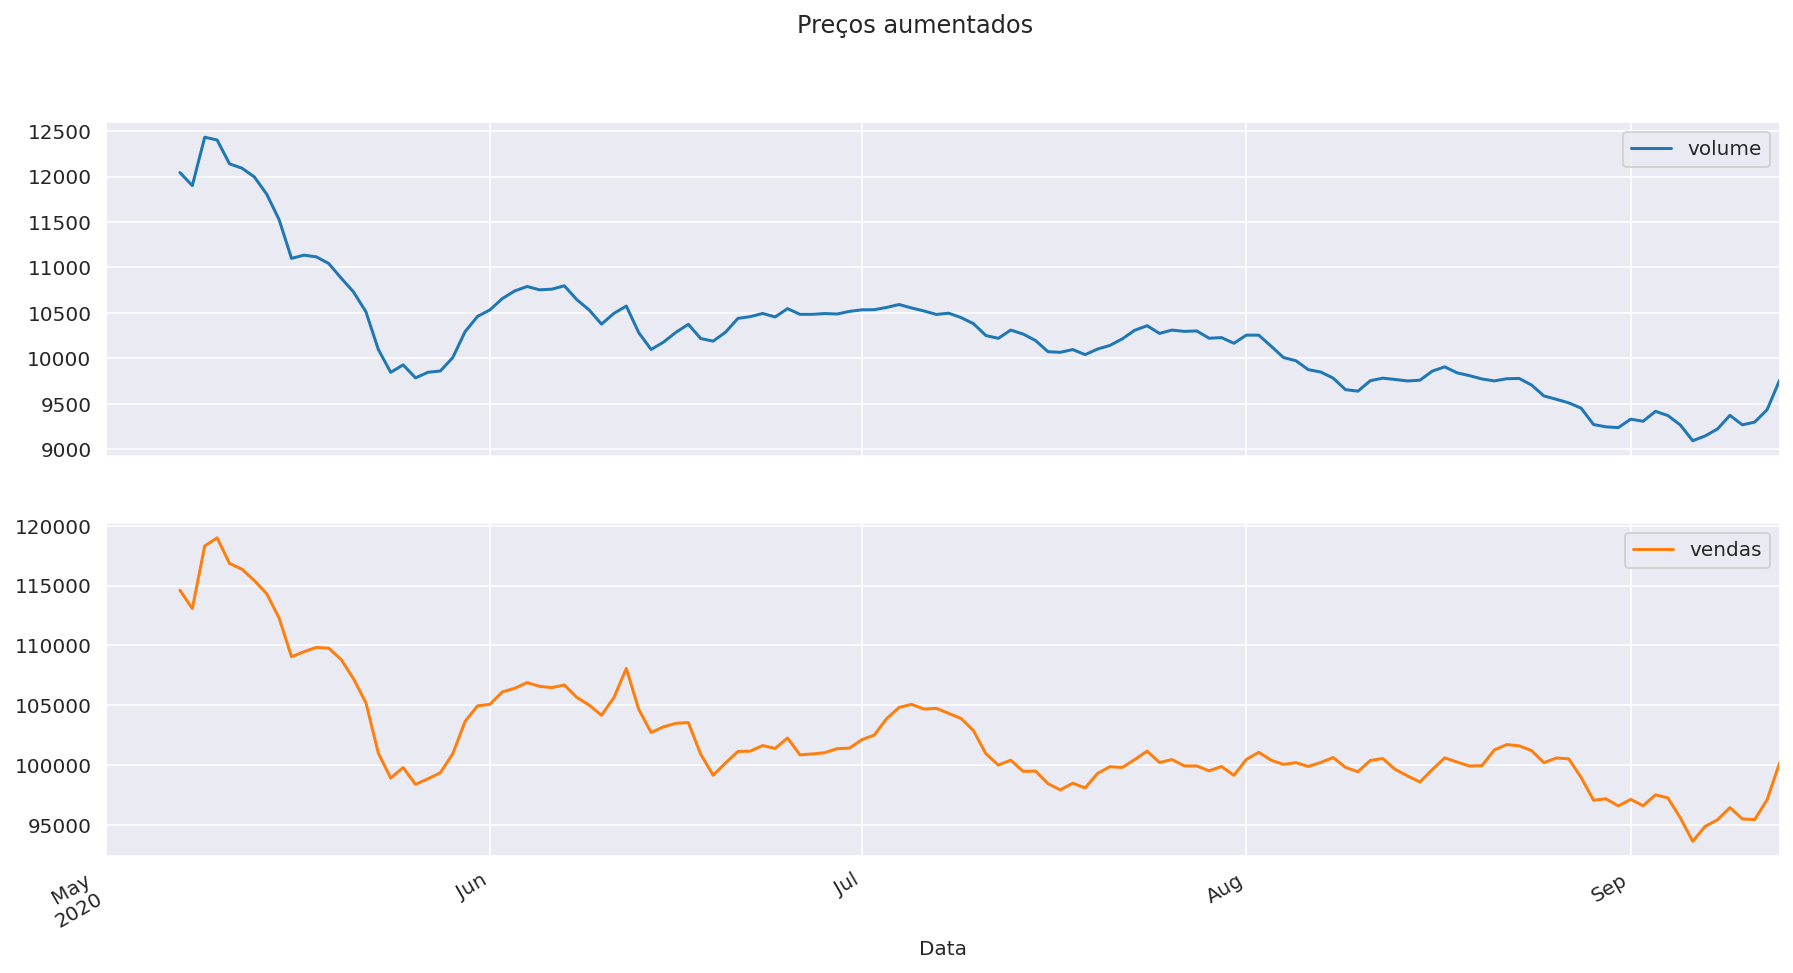

In [ ]:
df_trans = df_preco_before[df_preco_before.aumento==True]
lista = df_trans.index.tolist()
df_delta_aumento = df_virada[df_virada['SK_PRODUTO'].isin(lista)]
df_delta_aumento = df_delta_aumento.groupby(['Data']).sum()
df_delta_aumento['MA_volume'] = df_delta_aumento.VOLUME.rolling(window=7).mean()
df_delta_aumento['MA_vendas'] = df_delta_aumento.VENDAS.rolling(window=7).mean()
df_plot = pd.DataFrame({
   'volume': df_delta_aumento.MA_volume.tolist(),
   'vendas': df_delta_aumento.MA_vendas.tolist()
   }, index=df_delta_aumento.index)

df_plot.plot(figsize=(15,7.5), subplots=True, title='Preços aumentados')

## Média Móvel dos itens que diminuiram

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7faf25e707f0>,
      dtype=object)

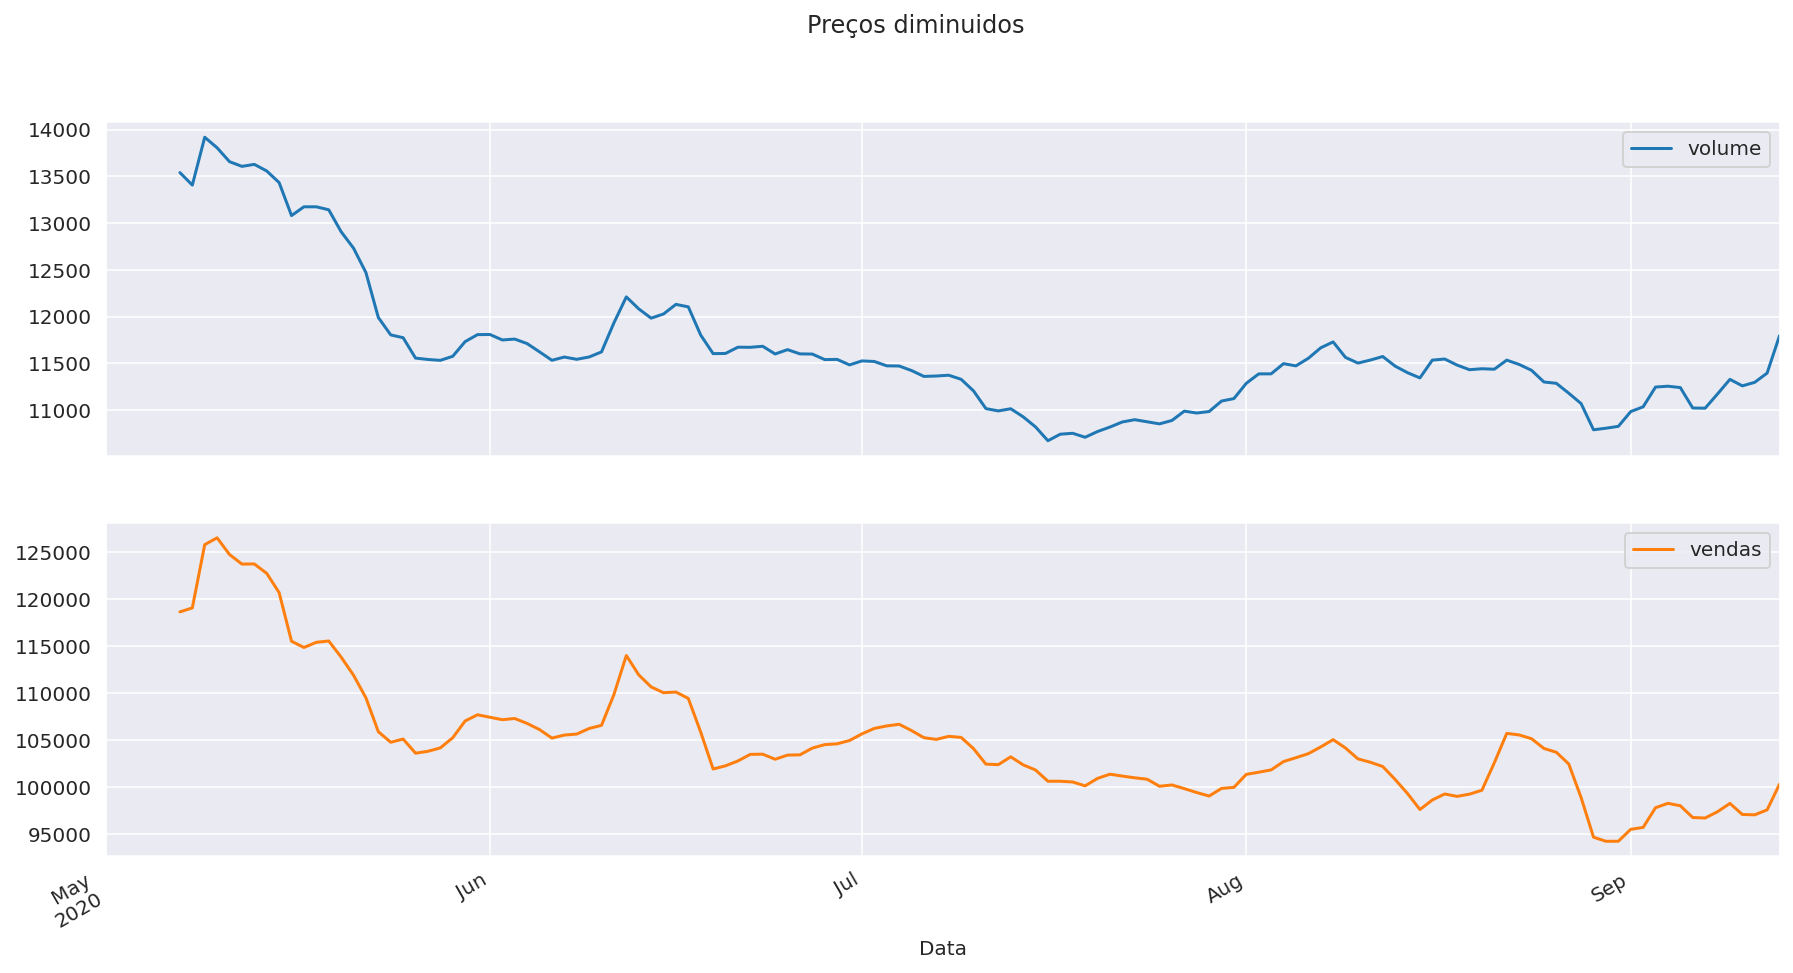

In [ ]:
df_trans = df_preco_before[df_preco_before.aumento==False]
lista = df_trans.index.tolist()
df_delta_aumento = df_virada[df_virada['SK_PRODUTO'].isin(lista)]
df_delta_aumento = df_delta_aumento.groupby(['Data']).sum()
df_delta_aumento['MA_volume'] = df_delta_aumento.VOLUME.rolling(window=7).mean()
df_delta_aumento['MA_vendas'] = df_delta_aumento.VENDAS.rolling(window=7).mean()
df_plot = pd.DataFrame({
   'volume': df_delta_aumento.MA_volume.tolist(),
   'vendas': df_delta_aumento.MA_vendas.tolist()
   }, index=df_delta_aumento.index)

df_plot.plot(figsize=(15,7.5), subplots=True, title='Preços diminuidos')

## Batch 1 23/07


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7faf25fd1400>,
      dtype=object)

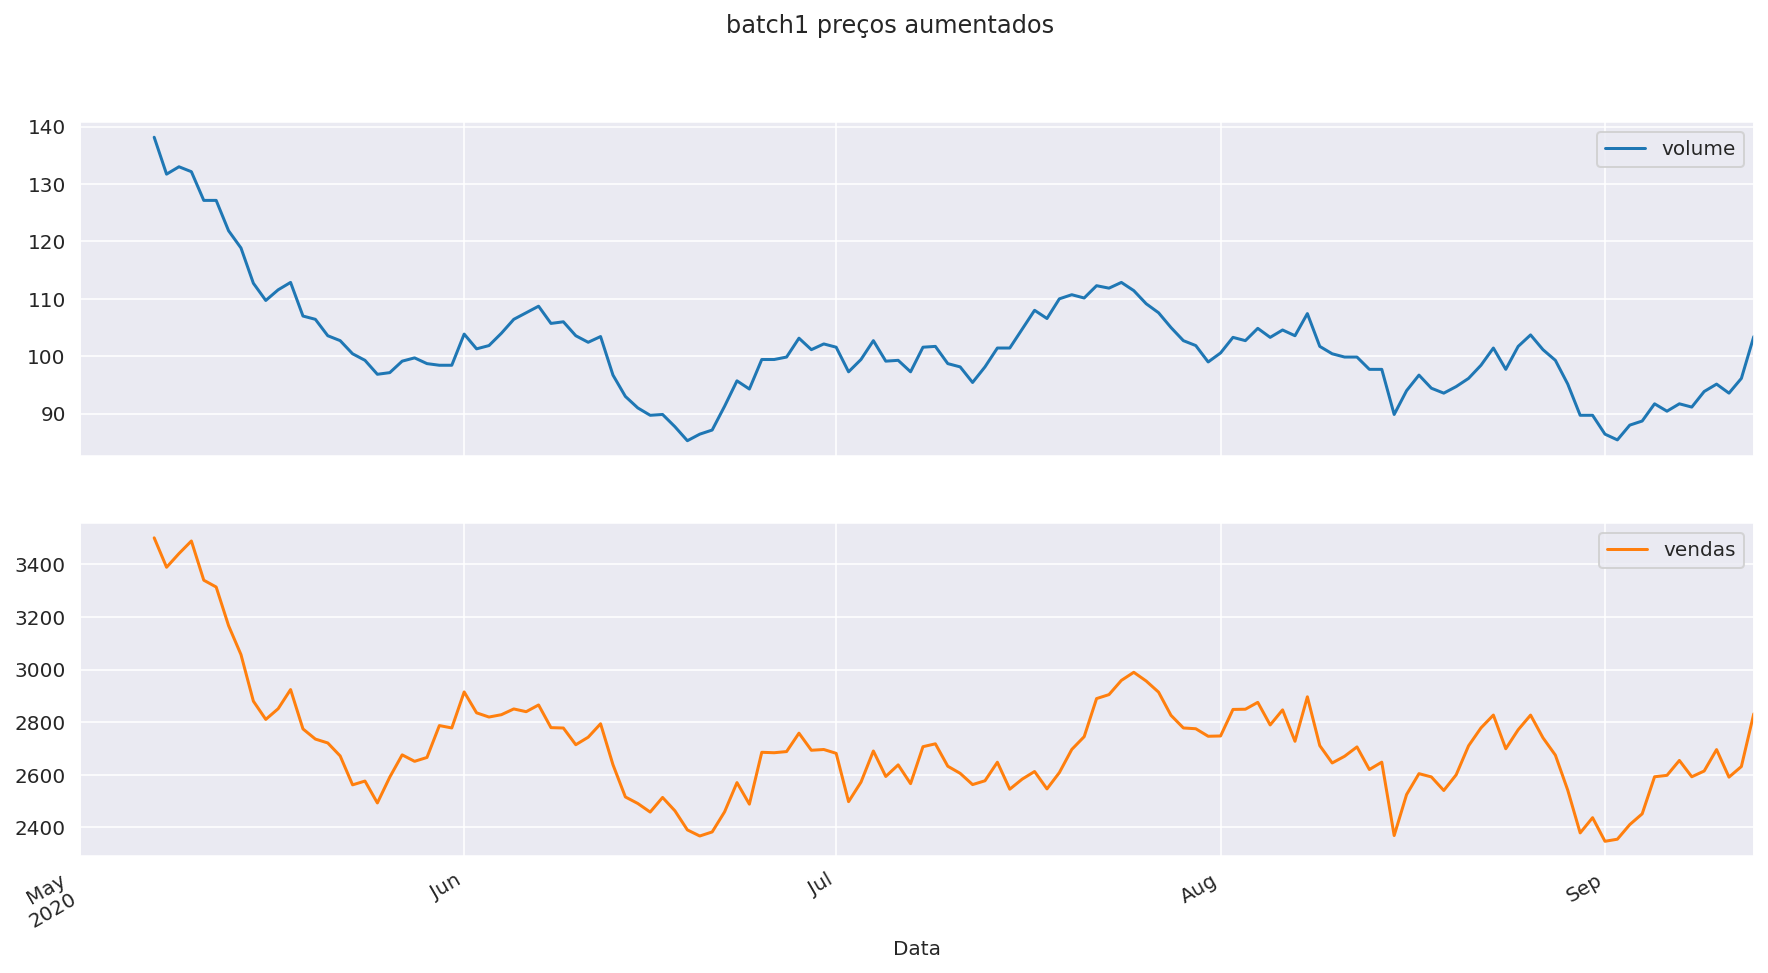

In [ ]:
df_trans = df_preco_before[(df_preco_before.aumento==True) & (df_preco_before.index.isin(batch1))]
lista = df_trans.index.tolist()
df_delta_aumento = df_virada[df_virada['SK_PRODUTO'].isin(lista)]
df_delta_aumento = df_delta_aumento.groupby(['Data']).sum()
df_delta_aumento['MA_volume'] = df_delta_aumento.VOLUME.rolling(window=7).mean()
df_delta_aumento['MA_vendas'] = df_delta_aumento.VENDAS.rolling(window=7).mean()
df_plot = pd.DataFrame({
   'volume': df_delta_aumento.MA_volume.tolist(),
   'vendas': df_delta_aumento.MA_vendas.tolist()
   }, index=df_delta_aumento.index)

df_plot.plot(figsize=(15,7.5), subplots=True, title='batch1 preços aumentados')


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7faf25c930b8>,
      dtype=object)

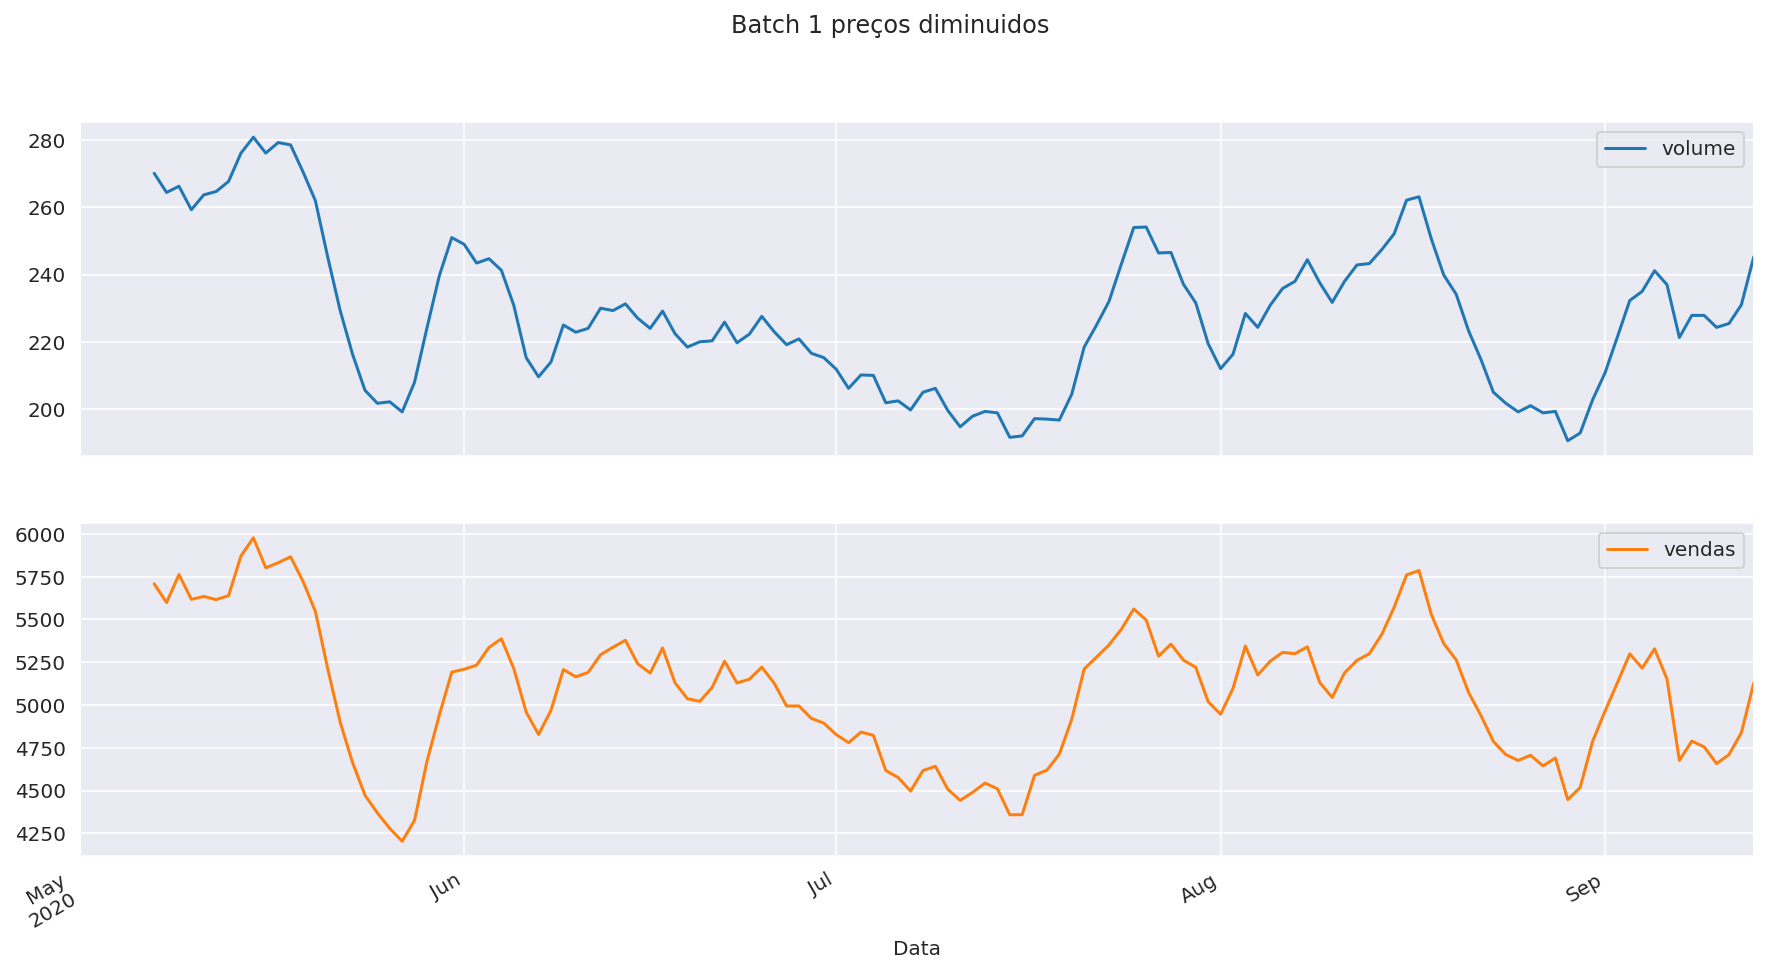

In [ ]:
df_trans = df_preco_before[(df_preco_before.aumento==False) & (df_preco_before.index.isin(batch1))]
lista = df_trans.index.tolist()
df_delta_aumento = df_virada[df_virada['SK_PRODUTO'].isin(lista)]
df_delta_aumento = df_delta_aumento.groupby(['Data']).sum()
df_delta_aumento['MA_volume'] = df_delta_aumento.VOLUME.rolling(window=7).mean()
df_delta_aumento['MA_vendas'] = df_delta_aumento.VENDAS.rolling(window=7).mean()
df_plot = pd.DataFrame({
   'volume': df_delta_aumento.MA_volume.tolist(),
   'vendas': df_delta_aumento.MA_vendas.tolist()
   }, index=df_delta_aumento.index)

df_plot.plot(figsize=(15,7.5), subplots=True, title = 'Batch 1 preços diminuidos')

## Batch 2 25/07

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7faf263c2c18>,
      dtype=object)

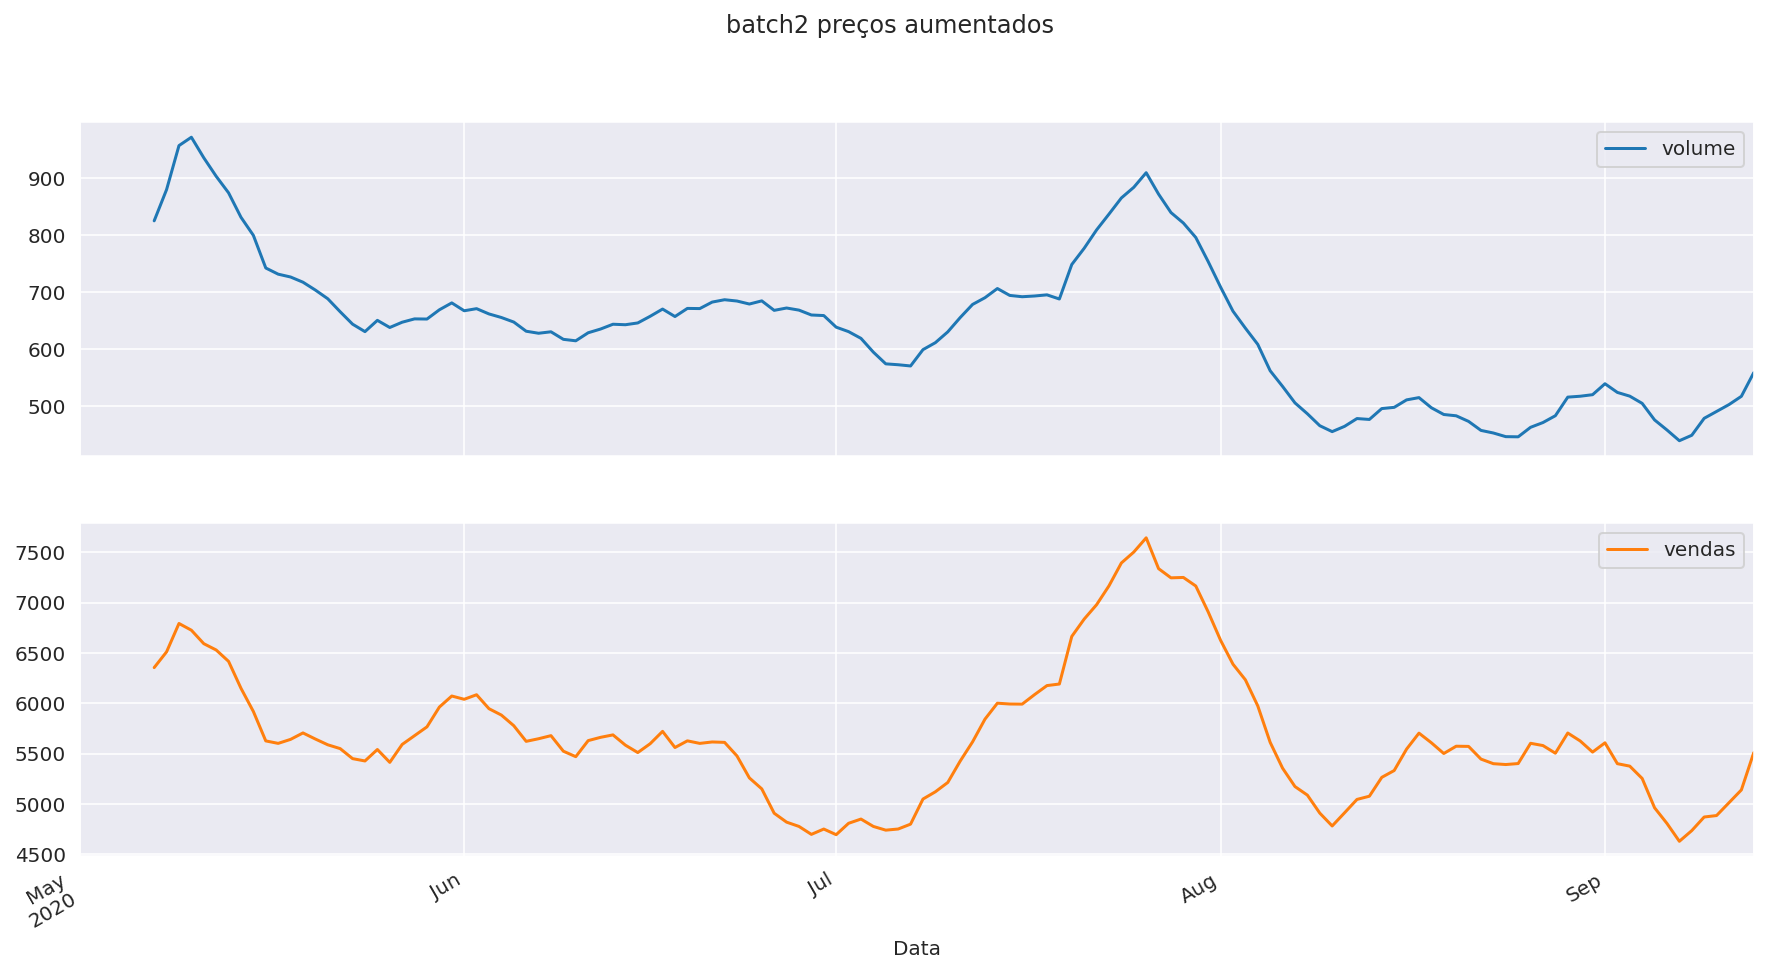

In [ ]:
df_trans = df_preco_before[(df_preco_before.aumento==True) & (df_preco_before.index.isin(batch2))]
lista = df_trans.index.tolist()
df_delta_aumento = df_virada[df_virada['SK_PRODUTO'].isin(lista)]
df_delta_aumento = df_delta_aumento.groupby(['Data']).sum()
df_delta_aumento['MA_volume'] = df_delta_aumento.VOLUME.rolling(window=7).mean()
df_delta_aumento['MA_vendas'] = df_delta_aumento.VENDAS.rolling(window=7).mean()
df_plot = pd.DataFrame({
   'volume': df_delta_aumento.MA_volume.tolist(),
   'vendas': df_delta_aumento.MA_vendas.tolist()
   }, index=df_delta_aumento.index)

df_plot.plot(figsize=(15,7.5), subplots=True, title='batch2 preços aumentados')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7faf3c1cb5f8>,
      dtype=object)

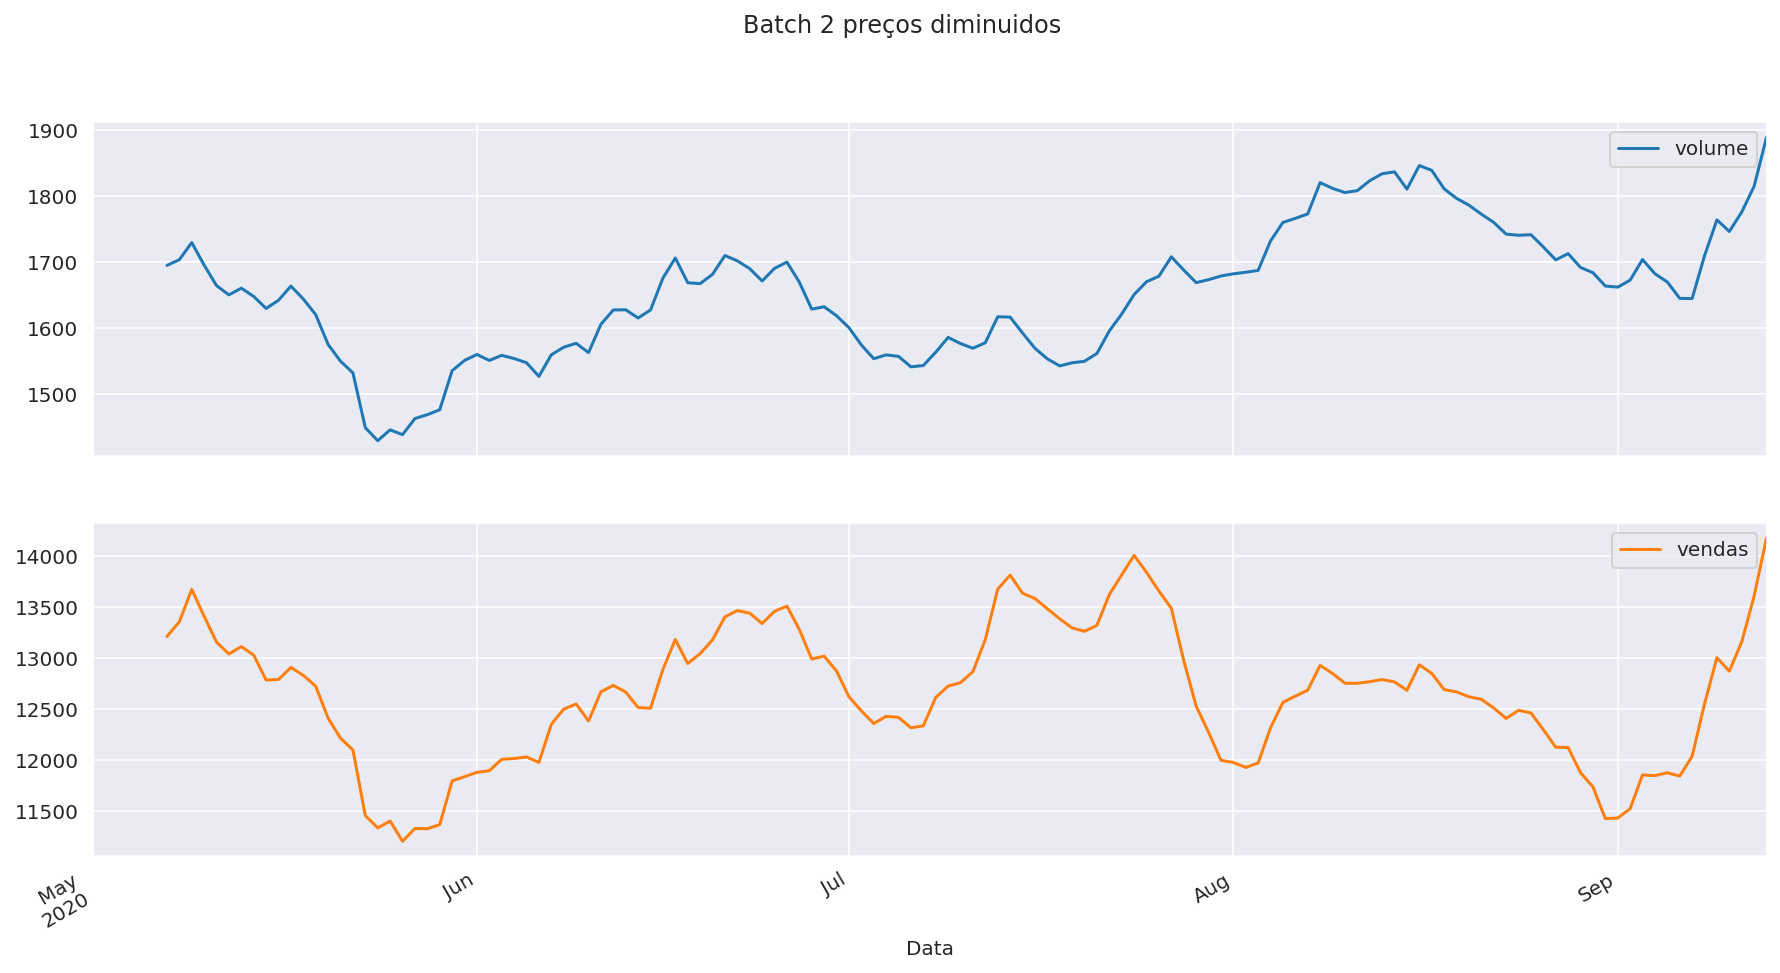

In [ ]:
df_trans = df_preco_before[(df_preco_before.aumento==False) & (df_preco_before.index.isin(batch2))]
lista = df_trans.index.tolist()
df_delta_aumento = df_virada[df_virada['SK_PRODUTO'].isin(lista)]
df_delta_aumento = df_delta_aumento.groupby(['Data']).sum()
df_delta_aumento['MA_volume'] = df_delta_aumento.VOLUME.rolling(window=7).mean()
df_delta_aumento['MA_vendas'] = df_delta_aumento.VENDAS.rolling(window=7).mean()
df_plot = pd.DataFrame({
   'volume': df_delta_aumento.MA_volume.tolist(),
   'vendas': df_delta_aumento.MA_vendas.tolist()
   }, index=df_delta_aumento.index)

df_plot.plot(figsize=(15,7.5), subplots=True, title = 'Batch 2 preços diminuidos')

## Batch 3 28/07

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7faf25a6e6a0>,
      dtype=object)

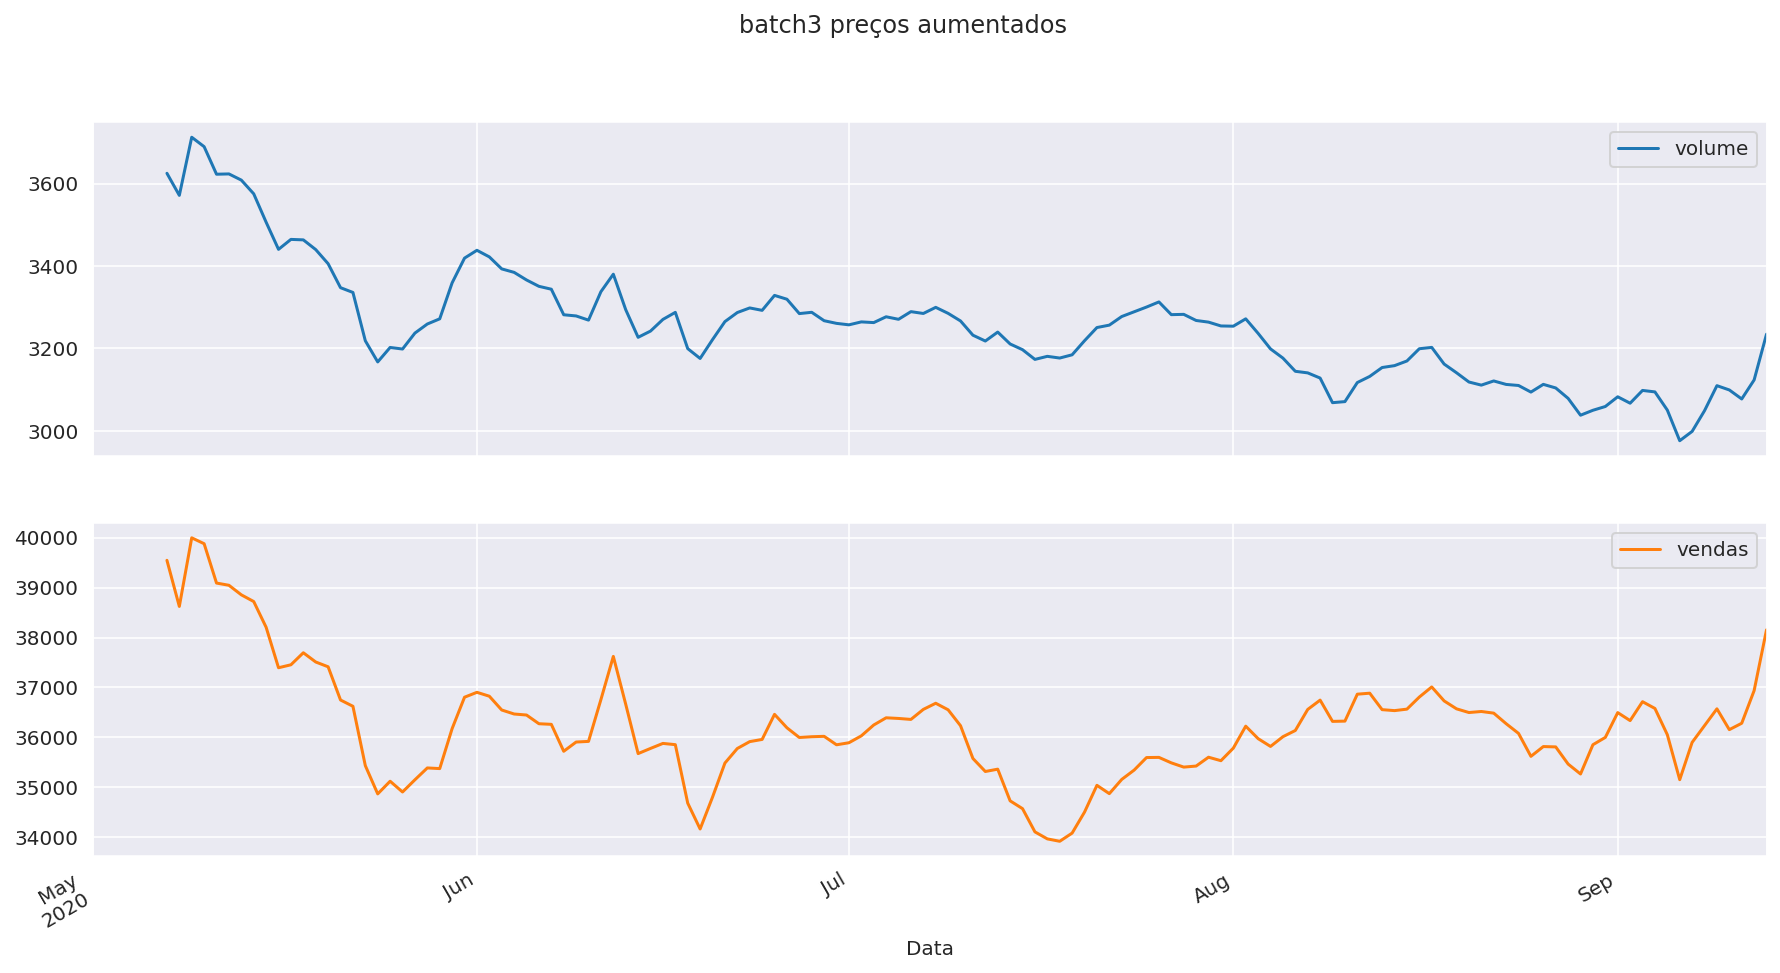

In [ ]:
df_trans = df_preco_before[(df_preco_before.aumento==True) & (df_preco_before.index.isin(batch3))]
lista = df_trans.index.tolist()
df_delta_aumento = df_virada[df_virada['SK_PRODUTO'].isin(lista)]
df_delta_aumento = df_delta_aumento.groupby(['Data']).sum()
df_delta_aumento['MA_volume'] = df_delta_aumento.VOLUME.rolling(window=7).mean()
df_delta_aumento['MA_vendas'] = df_delta_aumento.VENDAS.rolling(window=7).mean()
df_plot = pd.DataFrame({
   'volume': df_delta_aumento.MA_volume.tolist(),
   'vendas': df_delta_aumento.MA_vendas.tolist()
   }, index=df_delta_aumento.index)

df_plot.plot(figsize=(15,7.5), subplots=True, title='batch3 preços aumentados')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7faf2596dcc0>,
      dtype=object)

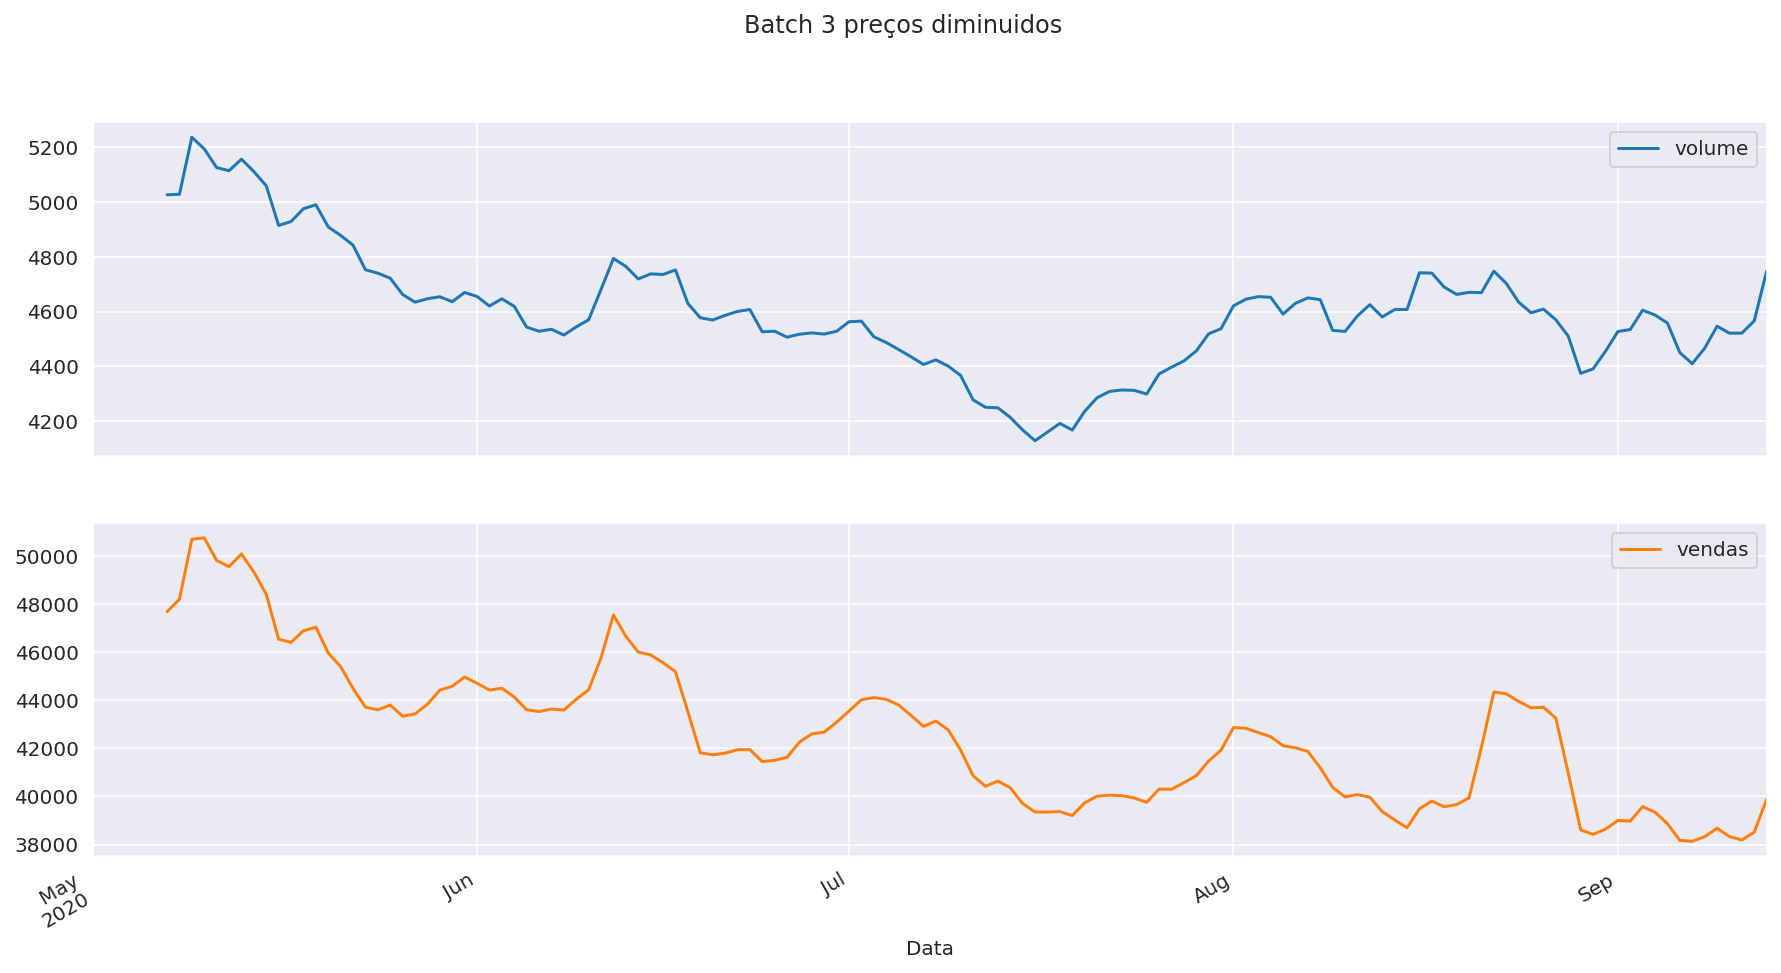

In [ ]:
df_trans = df_preco_before[(df_preco_before.aumento==False) & (df_preco_before.index.isin(batch3))]
lista = df_trans.index.tolist()
df_delta_aumento = df_virada[df_virada['SK_PRODUTO'].isin(lista)]
df_delta_aumento = df_delta_aumento.groupby(['Data']).sum()
df_delta_aumento['MA_volume'] = df_delta_aumento.VOLUME.rolling(window=7).mean()
df_delta_aumento['MA_vendas'] = df_delta_aumento.VENDAS.rolling(window=7).mean()
df_plot = pd.DataFrame({
   'volume': df_delta_aumento.MA_volume.tolist(),
   'vendas': df_delta_aumento.MA_vendas.tolist()
   }, index=df_delta_aumento.index)

df_plot.plot(figsize=(15,7.5), subplots=True, title = 'Batch 3 preços diminuidos')

## Batch 4 29/07


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7faf2587a208>,
      dtype=object)

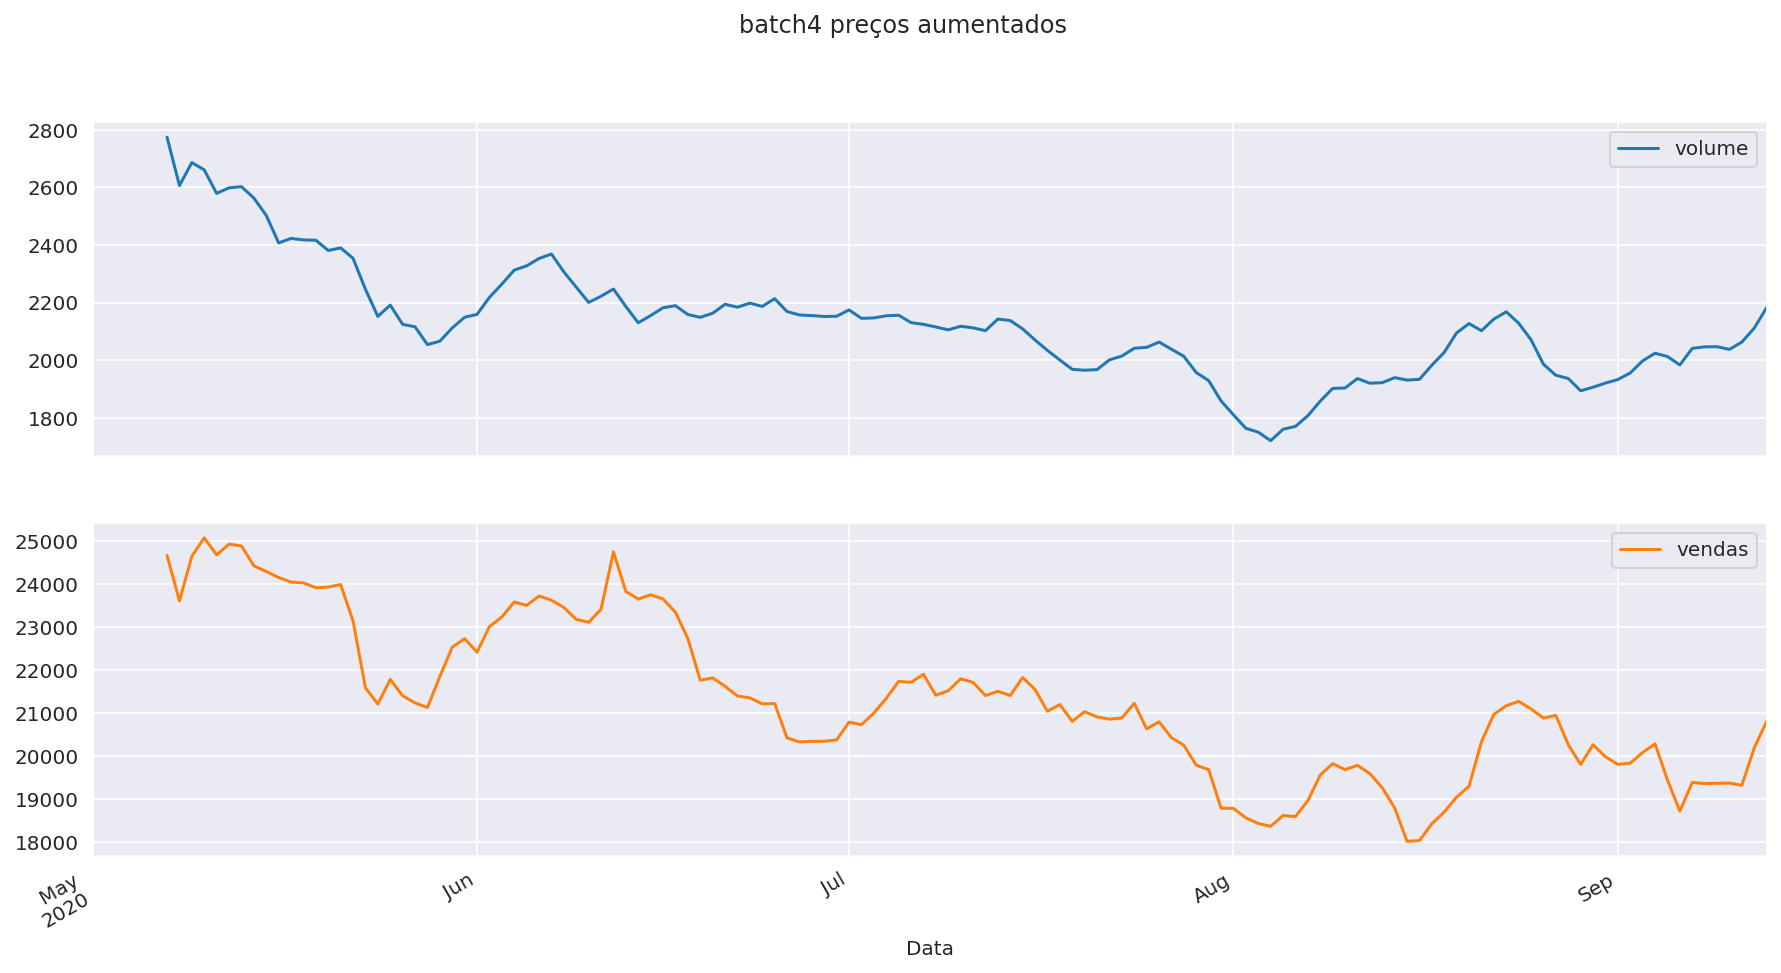

In [ ]:
df_trans = df_preco_before[(df_preco_before.aumento==True) & (df_preco_before.index.isin(batch4))]
lista = df_trans.index.tolist()
df_delta_aumento = df_virada[df_virada['SK_PRODUTO'].isin(lista)]
df_delta_aumento = df_delta_aumento.groupby(['Data']).sum()
df_delta_aumento['MA_volume'] = df_delta_aumento.VOLUME.rolling(window=7).mean()
df_delta_aumento['MA_vendas'] = df_delta_aumento.VENDAS.rolling(window=7).mean()
df_plot = pd.DataFrame({
   'volume': df_delta_aumento.MA_volume.tolist(),
   'vendas': df_delta_aumento.MA_vendas.tolist()
   }, index=df_delta_aumento.index)

df_plot.plot(figsize=(15,7.5), subplots=True, title='batch4 preços aumentados')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7faf2578e9e8>,
      dtype=object)

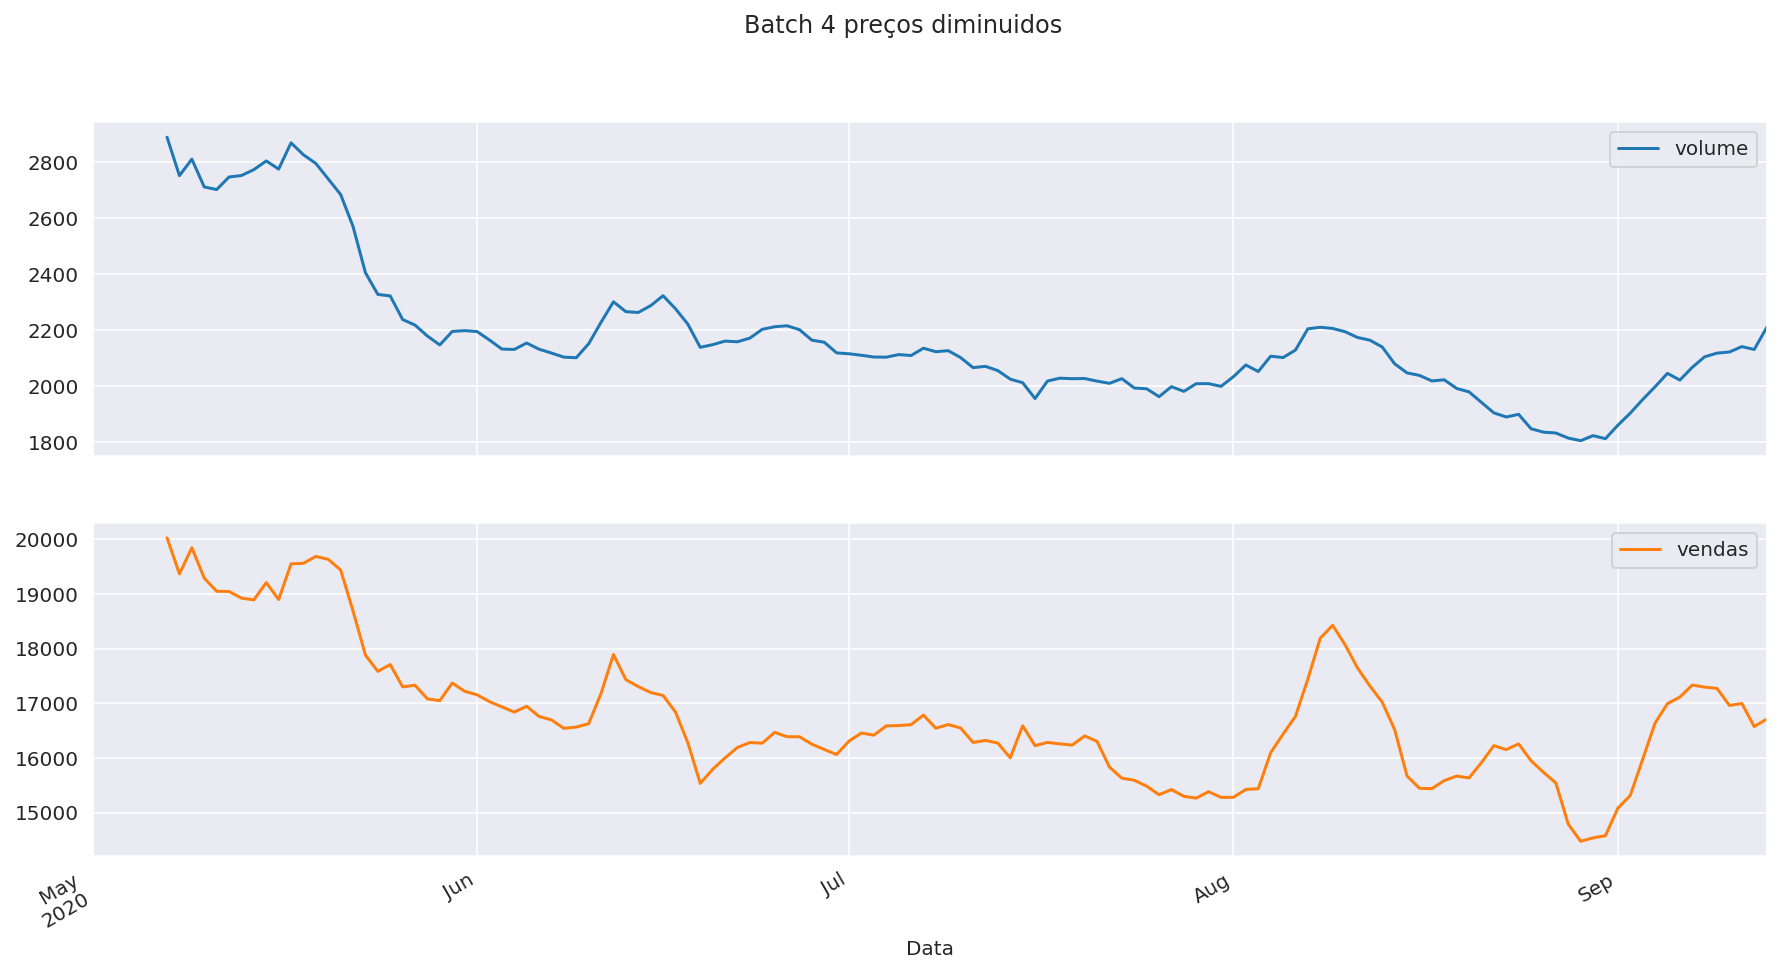

In [ ]:
df_trans = df_preco_before[(df_preco_before.aumento==False) & (df_preco_before.index.isin(batch4))]
lista = df_trans.index.tolist()
df_delta_aumento = df_virada[df_virada['SK_PRODUTO'].isin(lista)]
df_delta_aumento = df_delta_aumento.groupby(['Data']).sum()
df_delta_aumento['MA_volume'] = df_delta_aumento.VOLUME.rolling(window=7).mean()
df_delta_aumento['MA_vendas'] = df_delta_aumento.VENDAS.rolling(window=7).mean()
df_plot = pd.DataFrame({
   'volume': df_delta_aumento.MA_volume.tolist(),
   'vendas': df_delta_aumento.MA_vendas.tolist()
   }, index=df_delta_aumento.index)

df_plot.plot(figsize=(15,7.5), subplots=True, title = 'Batch 4 preços diminuidos')

## Batch 5 13/08

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7faf25695d68>,
      dtype=object)

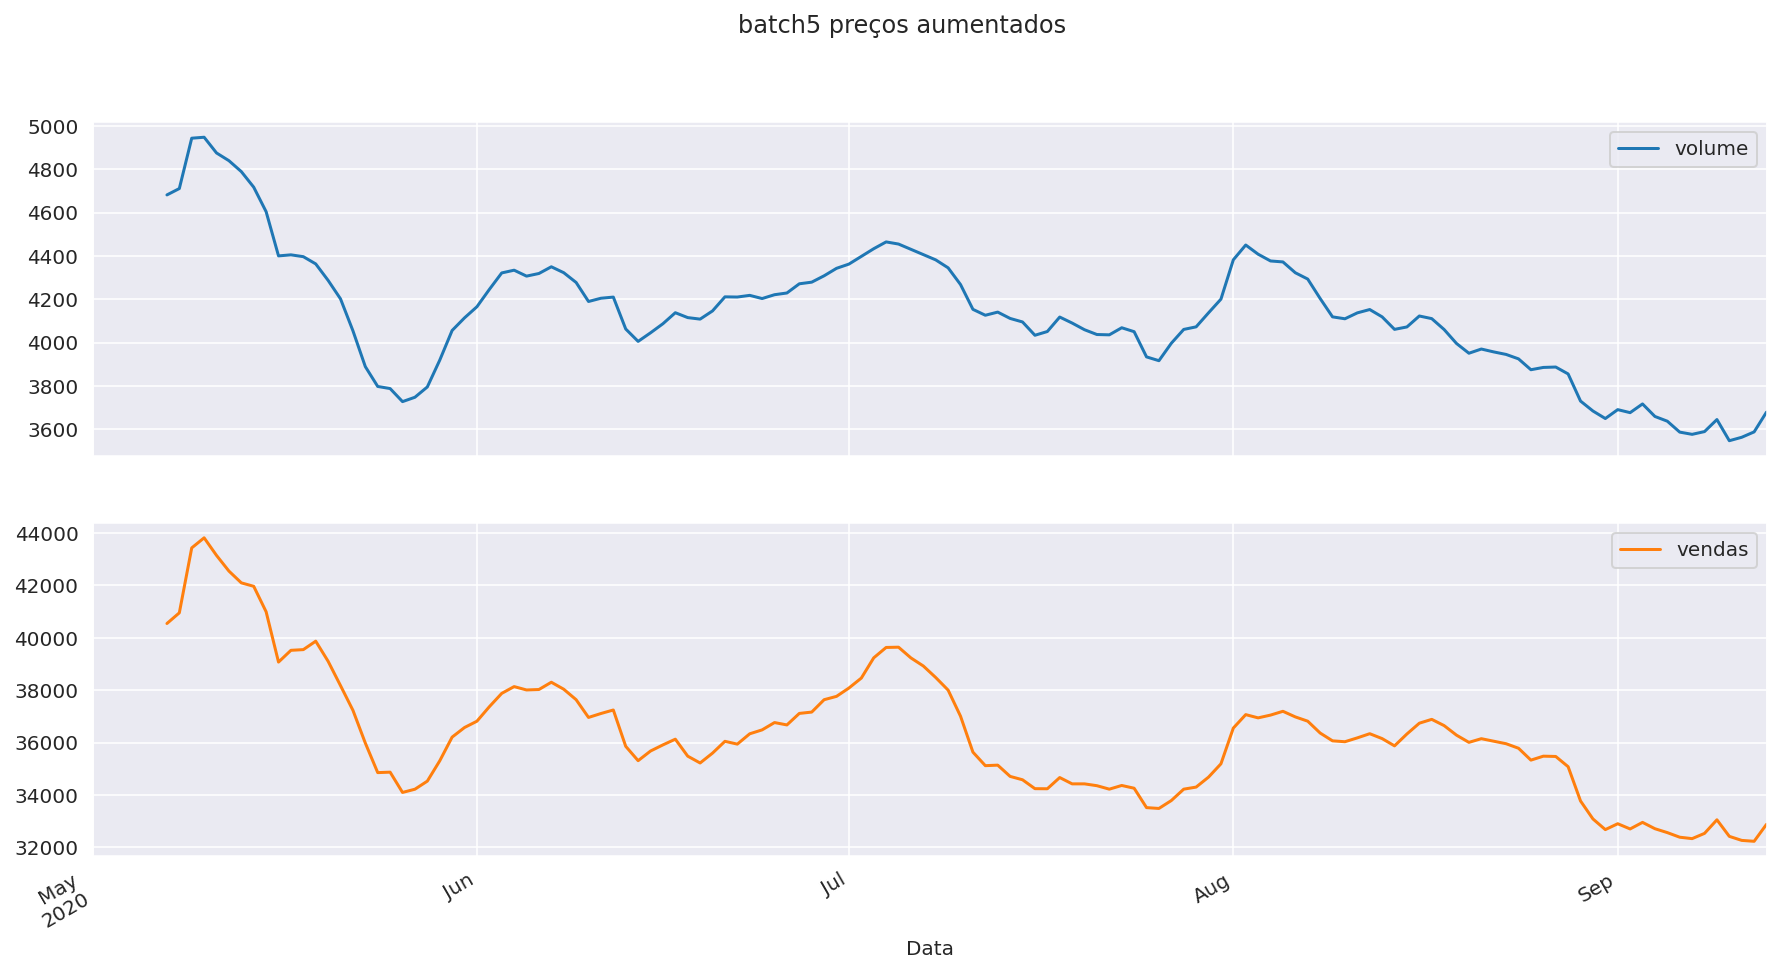

In [ ]:
df_trans = df_preco_before[(df_preco_before.aumento==True) & (df_preco_before.index.isin(batch5))]
lista = df_trans.index.tolist()
df_delta_aumento = df_virada[df_virada['SK_PRODUTO'].isin(lista)]
df_delta_aumento = df_delta_aumento.groupby(['Data']).sum()
df_delta_aumento['MA_volume'] = df_delta_aumento.VOLUME.rolling(window=7).mean()
df_delta_aumento['MA_vendas'] = df_delta_aumento.VENDAS.rolling(window=7).mean()
df_plot = pd.DataFrame({
   'volume': df_delta_aumento.MA_volume.tolist(),
   'vendas': df_delta_aumento.MA_vendas.tolist()
   }, index=df_delta_aumento.index)

df_plot.plot(figsize=(15,7.5), subplots=True, title='batch5 preços aumentados')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7faf255b9278>,
      dtype=object)

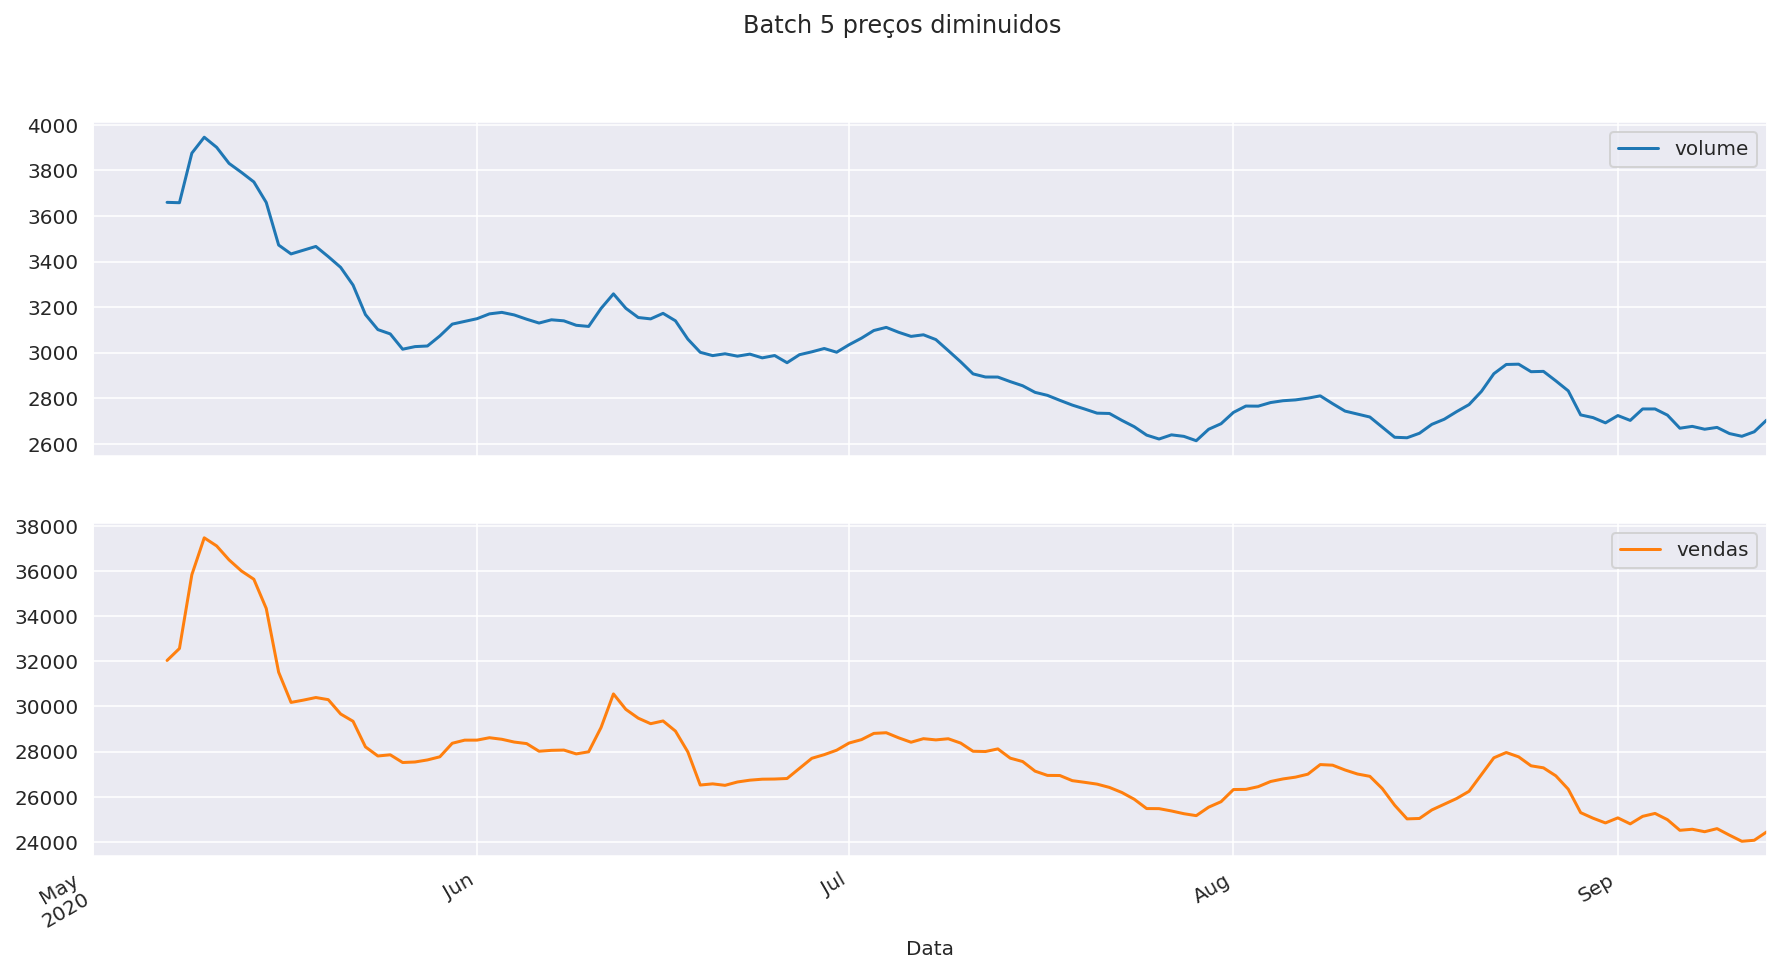

In [ ]:
df_trans = df_preco_before[(df_preco_before.aumento==False) & (df_preco_before.index.isin(batch5))]
lista = df_trans.index.tolist()
df_delta_aumento = df_virada[df_virada['SK_PRODUTO'].isin(lista)]
df_delta_aumento = df_delta_aumento.groupby(['Data']).sum()
df_delta_aumento['MA_volume'] = df_delta_aumento.VOLUME.rolling(window=7).mean()
df_delta_aumento['MA_vendas'] = df_delta_aumento.VENDAS.rolling(window=7).mean()
df_plot = pd.DataFrame({
   'volume': df_delta_aumento.MA_volume.tolist(),
   'vendas': df_delta_aumento.MA_vendas.tolist()
   }, index=df_delta_aumento.index)

df_plot.plot(figsize=(15,7.5), subplots=True, title = 'Batch 5 preços diminuidos')

In [ ]:
df_preco = df_virada.groupby(['Data']).mean()
df_preco['preco'] = df_preco['VENDAS']/df_preco['VOLUME']
df_preco.tail()

,SK_LOJA,SK_PRODUTO,VOLUME,VENDAS,DESCONTOS,IMPOSTOS,CUSTOS,MARGEM,CUPONS,delta,preco
Data,,,,,,,,,,,
2020-09-09,58.008258,24271.451604,2.853391,25.804451,0.150566,2.148926,13.981086,9.674439,1.967781,37.315013,9.043433
2020-09-10,58.312883,24381.445694,2.752883,25.406594,0.151917,2.185458,13.796967,9.424169,1.866762,38.497936,9.229087
2020-09-11,58.459474,24399.026013,2.901013,27.726581,0.195964,2.522329,14.961522,10.242730,1.951944,39.420044,9.557551
2020-09-12,58.875872,24486.624252,2.975823,28.610808,0.221396,2.560198,14.113736,11.936873,2.004860,40.579138,9.614420
2020-09-13,58.952734,24521.428516,2.962891,27.718547,0.168818,2.356840,15.027184,10.334523,2.055859,41.590625,9.355238


### Média do preço diária

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb5c5cea978>],
      dtype=object)

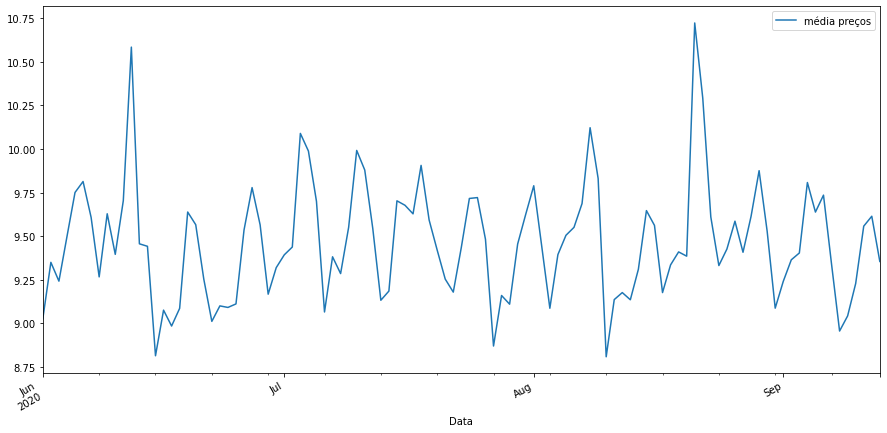

In [ ]:
df_plot = pd.DataFrame({
   'média preços': df_preco.preco.tolist()
   }, index=df_preco.index)

df_plot.plot(figsize=(15,7.5), subplots=True)

In [ ]:
df_preco_before = df_before.groupby(['SK_PRODUTO']).mean()
df_preco_before['preco'] = df_preco_before['VENDAS']/df_preco_before['VOLUME']
df_preco_after = df_after.groupby(['SK_PRODUTO']).mean()
df_preco_after['preco'] = df_preco_after['VENDAS']/df_preco_after['VOLUME']
dic = dict(zip(df_preco_after.index, df_preco_after.preco))
df_preco_before['preco_after'] = df_preco_before.index.map(dic)
df_preco_before.head()

,SK_LOJA,VOLUME,VENDAS,DESCONTOS,IMPOSTOS,CUSTOS,MARGEM,CUPONS,delta,preco,preco_after
SK_PRODUTO,,,,,,,,,,,
40,60.114943,6.911877,19.878812,0.052452,0.0,5.972107,13.906705,5.877395,-14.149425,2.876037,2.942632
105,59.522124,2.247788,11.197168,0.019292,0.0,3.993009,7.204159,1.933628,-14.548673,4.981417,4.275848
115,60.555556,3.606061,35.220455,0.013687,0.0,14.961212,20.259242,2.818182,-14.676768,9.767017,8.232315
453,59.638211,5.166667,27.023780,0.028211,0.0,10.882317,16.141463,3.516260,-14.471545,5.230409,4.985563
564,58.509934,3.185430,17.896854,0.022285,0.0,9.091987,8.804868,3.119205,-14.642384,5.618347,4.521581


In [ ]:
import numpy as np
df_preco_before['aumento'] = df_preco_before['preco_after'] > df_preco_before['preco']
print("Quantidade de SKU´s com preços aumentados e reduzidos")
df_preco_before.aumento.value_counts()

Quantidade de SKU´s com preços aumentados e reduzidos


True     996
False    850
Name: aumento, dtype: int64

In [ ]:
controle = pd.read_excel('/content/drive/My Drive/Produtos_Controle_Analisados.xlsx')
produto = pd.read_csv('/content/drive/My Drive/Cópia de dim_produto.csv')
dic = dict(zip(produto.COD_INTERNO, produto.SK_PRODUTO))
controle['SK_PRODUTO'] = controle['COD_INTERNO'].map(dic)
controle.shape

(3930, 5)

In [ ]:
df_controle = df_filtered[df_filtered.SK_PRODUTO.isin(controle.SK_PRODUTO.tolist())]
df_data = df_controle.groupby(['Data']).sum()
df_data['MA_volume'] = df_data.VOLUME.rolling(window=7).mean()
df_data['MA_vendas'] = df_data.VENDAS.rolling(window=7).mean()
df_data.shape

(105, 11)

### Gráfico da média móvel de 7 dias da soma de Volume e Vendas do grupo controle.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb5bc0139e8>,
      dtype=object)

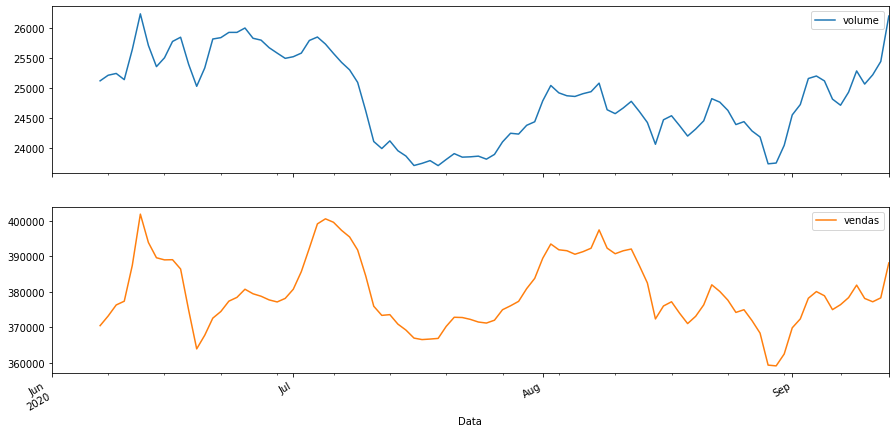

In [ ]:
df_plot = pd.DataFrame({
   'volume': df_data.MA_volume.tolist(),
   'vendas': df_data.MA_vendas.tolist()
   }, index=df_data.index)

df_plot.plot(figsize=(15,7.5), subplots=True)

In [ ]:
import warnings
import plotly.express as px
warnings.filterwarnings('ignore')
dic = dict(zip(produto.SK_PRODUTO, produto.DESC_PRODUTO))
df_preco_before['DESC_PRODUTO'] = df_preco_before.index.map(dic)
dic = dict(zip(produto.SK_PRODUTO, produto.DESC_SECAO))
df_preco_before['DESC_SECAO'] = df_preco_before.index.map(dic)
df_preco_before['ratio_preco'] = df_preco_before['preco_after']/df_preco_before['preco']
df_prod_after = df_after.groupby('SK_PRODUTO').sum()
df_prod_before = df_before.groupby('SK_PRODUTO').sum()
dic = dict(zip(df_prod_after.index, df_prod_after.VOLUME))
dic1 = dict(zip(df_prod_before.index, df_prod_before.VOLUME))
df_preco_before['SK_PRODUTO'] = df_preco_before.index
df_preco_before['volume'] = df_preco_before.SK_PRODUTO.map(dic1)
df_preco_before['volume_after'] = df_preco_before.SK_PRODUTO.map(dic)
df_preco_before['ratio_volume'] = df_preco_before['volume_after']/df_preco_before['volume']
df_preco_before = df_preco_before[df_preco_before.ratio_volume < 2]
fig = px.scatter(df_preco_before, x="ratio_preco", y="ratio_volume", size='volume', hover_data=['DESC_PRODUTO'], color='DESC_SECAO')
fig.show()

In [ ]:
import statsmodels.api as sm

X_constant = sm.add_constant(df_preco_before.ratio_volume)
lin_reg = sm.OLS(df_preco_before.ratio_preco,X_constant).fit()
lin_reg.summary()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            ratio_preco   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                     111.7
Date:                Wed, 16 Sep 2020   Prob (F-statistic):           2.29e-25
Time:                        19:43:26   Log-Likelihood:                 1564.4
No. Observations:                1780   AIC:                            -3125.
Df Residuals:                    1778   BIC:                            -3114.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            1.1068      0.009    126.756      0.000       1.090       1.124
ratio_volume    -0.0906      0.009    -10.569      0.000      -0.107      -0.074
==============================================================================
Omnibus:                      477.956   Durbin-Watson:                   1.458
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4953.557
Skew:                           0.952   Prob(JB):                         0.00
Kurtosis:                      10.948   Cond. No.                         7.19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

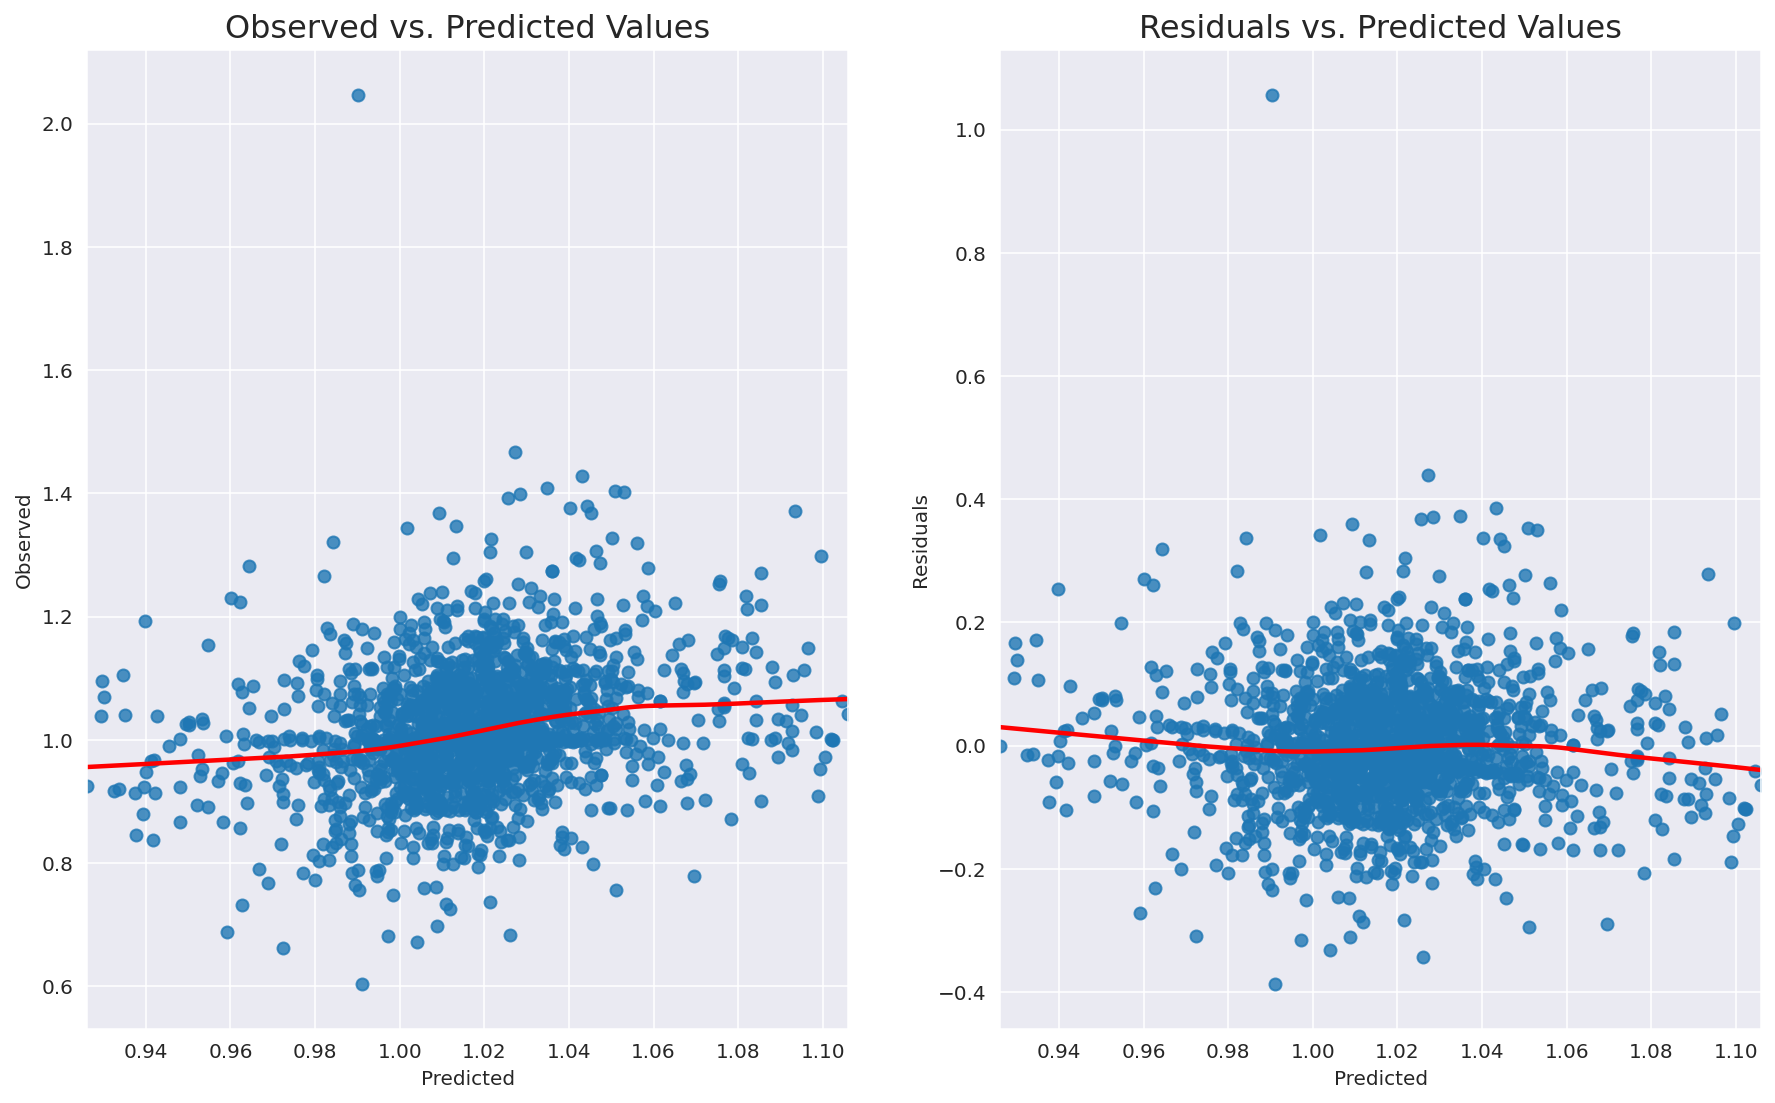

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format ='retina'
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)

def linearity_test(model, y):
    '''
    Function for visually inspecting the assumption of linearity in a linear regression model.
    It plots observed vs. predicted values and residuals vs. predicted values.
    
    Args:
    * model - fitted OLS model from statsmodels
    * y - observed values
    '''
    fitted_vals = model.predict()
    resids = model.resid

    fig, ax = plt.subplots(1,2)
    
    sns.regplot(x=fitted_vals, y=y, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Observed vs. Predicted Values', fontsize=16)
    ax[0].set(xlabel='Predicted', ylabel='Observed')

    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Residuals vs. Predicted Values', fontsize=16)
    ax[1].set(xlabel='Predicted', ylabel='Residuals')
    
linearity_test(lin_reg, df_preco_before.ratio_preco)    